# Project 2022

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
customers = pd.read_csv('customers_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
products = pd.read_csv('products_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
reviews = pd.read_csv('order_reviews_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')

# Dataset Summary

# Geo-Location Summary

In [3]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [4]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [5]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [6]:
# Revise city name são paulo to sao paulo
geolocation.replace(to_replace='são paulo',value='sao paulo',inplace=True)

# Orders Summary

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
# change date columns from object to date
orders[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']] = orders[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [12]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
orders1=orders['order_status'].value_counts()

# Reviews Summary

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [15]:
# change date columns from object to date
reviews[['review_creation_date','review_answer_timestamp']] = reviews[['review_creation_date','review_answer_timestamp']].apply(pd.to_datetime)

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [17]:
reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


# Combining all dataset into a single file

In [18]:
# Only Delivery shipments could check the delivery time
delivered = orders[orders['order_status']=='delivered'].dropna()

In [19]:
delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [20]:
# undelivered shipments
undelivered = orders[orders['order_status']!='delivered']

In [21]:
undelivered.count()

order_id                         2963
customer_id                      2963
order_status                     2963
order_purchase_timestamp         2963
order_approved_at                2817
order_delivered_carrier_date     1182
order_delivered_customer_date       6
order_estimated_delivery_date    2963
dtype: int64

In [22]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [23]:
# check the undelivered_rate
undelivered_rate = undelivered['order_id'].count()/orders['order_id'].count()
print("undelivered_rate : %5.2f" % undelivered_rate)

undelivered_rate :  0.03


Out of total order 0.03 is the undelivered rate.

In [24]:
total = undelivered['order_id'].count()
not_approved1 = undelivered['order_approved_at'].isna().sum()
not_shipped = undelivered['order_delivered_carrier_date'].isna().sum() - undelivered['order_approved_at'].isna().sum()
#not_delivered = undelivered['order_delivered_customer_date'].isna().sum() - undelivered['order_delivered_carrier_date'].isna().sum()
print("not_approved_rate : %5.2f, not_shipped_rate : %5.2f" % (not_approved1/total,not_shipped/total))

not_approved_rate :  0.05, not_shipped_rate :  0.55


Text(0.5, 1.0, 'Reason of undelivered orders')

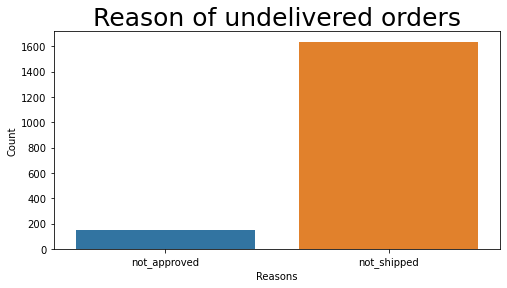

In [25]:
lst1 = ['not_approved', 'not_shipped']
lst2 = [not_approved1, not_shipped] 
df = pd.DataFrame(list(zip(lst1, lst2)), columns =['Reasons', 'Count']) 
fig = plt.subplots(figsize=(8, 4))
sns.barplot(x='Reasons',y='Count',data=df).set_title('Reason of undelivered orders', fontsize=25)

From this we can infer that, the packages are not delivered because as most of them are not shipped and also not delivered on time.

In [26]:
data_undelivered = pd.merge(undelivered,customers,on='customer_id',how='left')

In [27]:
data_undelivered_city=data_undelivered['customer_city'].value_counts().head(10)

In [28]:
data_undelivered_city

sao paulo         495
rio de janeiro    281
belo horizonte     76
brasilia           60
salvador           57
guarulhos          45
campinas           38
porto alegre       37
fortaleza          36
curitiba           32
Name: customer_city, dtype: int64

The above are the top 10 cities with the most undelivered count

In [30]:
data_undelivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963 entries, 0 to 2962
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       2963 non-null   object        
 1   customer_id                    2963 non-null   object        
 2   order_status                   2963 non-null   object        
 3   order_purchase_timestamp       2963 non-null   datetime64[ns]
 4   order_approved_at              2817 non-null   datetime64[ns]
 5   order_delivered_carrier_date   1182 non-null   datetime64[ns]
 6   order_delivered_customer_date  6 non-null      datetime64[ns]
 7   order_estimated_delivery_date  2963 non-null   datetime64[ns]
 8   customer_unique_id             2963 non-null   object        
 9   customer_zip_code_prefix       2963 non-null   int64         
 10  customer_city                  2963 non-null   object        
 11  customer_state   

In [32]:
# Exporting data,csv to data visiulization on Tableau
import os
os.makedirs(r'C:\Users\mjvaz\OneDrive\Documents\SIP\DataSet', exist_ok=True)  
data_undelivered.to_csv(r'C:\Users\mjvaz\OneDrive\Documents\SIP\DataSet\Undelivered_Review_Data.csv')

In [33]:
data_undelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
1,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
2,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
3,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
4,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG


# Sao Paulo Analysis

In [34]:
# selecting rows based on condition 
bad_reviewsc1 = data_undelivered.loc[data_undelivered['customer_city'] == 'sao paulo'] 
bad_reviewsc1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
10,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP
13,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP
15,95e42e6aaf6264cd3e77c06b32dc3003,29ef1f160ce630146dafa02052e2c5bf,shipped,2017-11-24 09:23:33,2017-11-24 10:51:26,2017-11-24 19:07:43,NaT,2017-12-08,68e9aca85421a3dc655325bcdf9c9912,3271,sao paulo,SP
21,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP


In [35]:
#print(counter(bad_reviewsc1['order_status']).most_common())
from collections import Counter
x = Counter(bad_reviewsc1['order_status'])
x.most_common()

[('shipped', 141),
 ('canceled', 140),
 ('unavailable', 109),
 ('processing', 52),
 ('invoiced', 52),
 ('approved', 1)]

The major reason for not delivered in Sao Paulo is shipped. Must reduce the shipping time.

# Rio de Janiero Analysis

In [36]:
# selecting rows based on condition 
bad_reviewsc2 = data_undelivered.loc[data_undelivered['customer_city'] == 'rio de janeiro'] 
bad_reviewsc2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
8,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,1c13e7a690e418f5a133c8a219b5a124,20910,rio de janeiro,RJ
16,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28,9a58c55c10b4eb6c69fb0874d8beb466,23025,rio de janeiro,RJ
29,c4abf2eb2ea936ee6fc6e630b152fb77,d7314e9d240737da330e0f83ac4bd257,shipped,2017-03-09 20:50:46,2017-03-09 20:50:46,2017-03-14 10:01:57,NaT,2017-04-03,0902b91d17bd2b9675664f8a4d6565c6,23067,rio de janeiro,RJ
32,ed1407b1e486fadba3e6cd4460dccd56,d83913dc23a7f3c90ff7a10d1b4bd4c6,shipped,2017-10-22 12:55:42,2017-10-22 13:14:28,2017-10-24 11:46:06,NaT,2017-11-14,583fb3ee33cf172db8eedc575ad88d0a,23050,rio de janeiro,RJ
39,ee0db22a8e742b752914016708470ec8,aae50600d30bf2efe013ca4c1754ded7,unavailable,2017-08-24 11:04:41,2017-08-24 11:15:11,NaT,NaT,2017-09-18,bdc67efa33dd0c3228b91714ac6e363c,23027,rio de janeiro,RJ


In [37]:
#print(counter(bad_reviewsc1['order_status']).most_common())
from collections import Counter
y = Counter(bad_reviewsc2['order_status'])
y.most_common()

[('shipped', 170),
 ('canceled', 48),
 ('unavailable', 33),
 ('processing', 15),
 ('invoiced', 14),
 ('created', 1)]

The major reason for not delivered in Sao Paulo is shipped. Must reduce the shipping time.

# Combining all dataset into a single file

In [38]:
data_delivered = pd.merge(delivered,customers,on='customer_id',how='left')

In [39]:
data_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
 8   customer_unique_id             96455 non-null  object        
 9   customer_zip_code_prefix       96455 non-null  int64         
 10  customer_city                  96455 non-null  object        
 11  customer_state 

In [40]:
orders_products = pd.merge(order_items,data_delivered,on='order_id',how='left')

In [41]:
orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    110173 non-null  object        
 8   order_status                   110173 non-null  object        
 9   order_purchase_timestamp       110173 non-null  datetime64[ns]
 10  order_approved_at              110173 non-null  datetime64[ns]
 11  

In [42]:
products = pd.merge(orders_products,products,on='product_id',how='left')

In [43]:
reviews = pd.merge(products,reviews,on='order_id', how='left')

In [44]:
data = pd.merge(reviews,order_payments,on='order_id',how='left')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118310 non-null  object        
 1   order_item_id                  118310 non-null  int64         
 2   product_id                     118310 non-null  object        
 3   seller_id                      118310 non-null  object        
 4   shipping_limit_date            118310 non-null  object        
 5   price                          118310 non-null  float64       
 6   freight_value                  118310 non-null  float64       
 7   customer_id                    115699 non-null  object        
 8   order_status                   115699 non-null  object        
 9   order_purchase_timestamp       115699 non-null  datetime64[ns]
 10  order_approved_at              115699 non-null  datetime64[ns]
 11  

In [46]:
data.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,payment_sequential,payment_installments,payment_value
count,118310.000000,118310.000000,118310.000000,115699.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,117332.000000,118307.000000,118307.000000,118307.000000
mean,1.196543,120.646603,20.032387,35080.587239,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,4.031390,1.094069,2.943317,172.575102
std,0.699489,184.109691,15.836850,29855.420232,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,1.387994,0.728579,2.777877,267.110727
min,1.000000,0.850000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,11310.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,1.000000,1.000000,60.850000
50%,1.000000,74.900000,16.280000,24320.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,1.000000,2.000000,108.200000
75%,1.000000,134.900000,21.180000,58812.500000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,1.000000,4.000000,189.260000
max,21.000000,6735.000000,409.680000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,29.000000,24.000000,13664.080000


In [47]:
#Dropping all the NaN values
data1=data.dropna(how='any')
data1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,6322c405c0f34bf3ad870fd1a6b1fced,5.0,Boa,Excelente serviço de compras on line.,2018-07-31,2018-08-01 23:05:10,1.0,credit_card,4.0,97.32
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,...,00800678dcf28b0ea0caef2147b6945d,1.0,produto não entregue,Mudo minha opinião assim que receber o produto...,2018-05-19,2018-05-22 10:52:24,1.0,credit_card,1.0,152.77
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.90,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,...,4ff9a24999699f7104ed23fec2563351,5.0,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",2018-06-14,2018-06-14 19:50:09,1.0,boleto,1.0,35.84
54,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.90,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,...,048baba3f11436d12b06dab572aafc21,1.0,Pessima,O produto chegou e estragou sozinho,2018-06-05,2018-06-06 19:01:54,1.0,credit_card,2.0,51.10
57,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.90,13.21,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,...,78412bf6c796b43df999fd87750d28ea,4.0,Recomendo,Produto como descrito. Mas não gostei pq o som...,2018-05-03,2018-05-06 13:42:10,1.0,credit_card,3.0,123.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118234,ffd6f465cab015b452d398ac1f5d978a,1,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43,1.0,credit_card,2.0,89.70
118235,ffd6f465cab015b452d398ac1f5d978a,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43,1.0,credit_card,2.0,89.70
118236,ffd6f465cab015b452d398ac1f5d978a,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43,1.0,credit_card,2.0,89.70
118260,ffe48cb3d8485e0cb0405e21192e592f,1,dd44ecaddb22d00c140856b180f5d9b4,54965bbe3e4f07ae045b90b0b8541f52,2018-07-11 18:30:38,119.90,27.14,c7d443bf742505394e4431d332fa5744,delivered,2018-06-29 18:11:54,...,3e46e959e03570ecdd743b9736758c54,3.0,Recomendo,"Encomendem um pouco mais, não tem o tamanho in...",2018-07-13,2018-07-13 18:07:36,1.0,credit_card,5.0,147.04


In [48]:
#Dropping all the Duplicates
data2=data1.drop_duplicates()
data2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,6322c405c0f34bf3ad870fd1a6b1fced,5.0,Boa,Excelente serviço de compras on line.,2018-07-31,2018-08-01 23:05:10,1.0,credit_card,4.0,97.32
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,...,00800678dcf28b0ea0caef2147b6945d,1.0,produto não entregue,Mudo minha opinião assim que receber o produto...,2018-05-19,2018-05-22 10:52:24,1.0,credit_card,1.0,152.77
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.90,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,...,4ff9a24999699f7104ed23fec2563351,5.0,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",2018-06-14,2018-06-14 19:50:09,1.0,boleto,1.0,35.84
54,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.90,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,...,048baba3f11436d12b06dab572aafc21,1.0,Pessima,O produto chegou e estragou sozinho,2018-06-05,2018-06-06 19:01:54,1.0,credit_card,2.0,51.10
57,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.90,13.21,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,...,78412bf6c796b43df999fd87750d28ea,4.0,Recomendo,Produto como descrito. Mas não gostei pq o som...,2018-05-03,2018-05-06 13:42:10,1.0,credit_card,3.0,123.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118234,ffd6f465cab015b452d398ac1f5d978a,1,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43,1.0,credit_card,2.0,89.70
118235,ffd6f465cab015b452d398ac1f5d978a,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43,1.0,credit_card,2.0,89.70
118236,ffd6f465cab015b452d398ac1f5d978a,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04,2018-05-05 01:32:43,1.0,credit_card,2.0,89.70
118260,ffe48cb3d8485e0cb0405e21192e592f,1,dd44ecaddb22d00c140856b180f5d9b4,54965bbe3e4f07ae045b90b0b8541f52,2018-07-11 18:30:38,119.90,27.14,c7d443bf742505394e4431d332fa5744,delivered,2018-06-29 18:11:54,...,3e46e959e03570ecdd743b9736758c54,3.0,Recomendo,"Encomendem um pouco mais, não tem o tamanho in...",2018-07-13,2018-07-13 18:07:36,1.0,credit_card,5.0,147.04


Out of 118310 data rows we now have only 11586 valid data rows without Nan & any duplicate values.

In [49]:
#Checking for NaN Values
data2.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
review_id                        0
review_score                     0
review_comment_title

In [50]:
#Dropping Columns with NaN values
#Doing this step to check if there are no NaN values
finaldata=data2.dropna(axis=1)

In [51]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11586 entries, 12 to 118269
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11586 non-null  object        
 1   order_item_id                  11586 non-null  int64         
 2   product_id                     11586 non-null  object        
 3   seller_id                      11586 non-null  object        
 4   shipping_limit_date            11586 non-null  object        
 5   price                          11586 non-null  float64       
 6   freight_value                  11586 non-null  float64       
 7   customer_id                    11586 non-null  object        
 8   order_status                   11586 non-null  object        
 9   order_purchase_timestamp       11586 non-null  datetime64[ns]
 10  order_approved_at              11586 non-null  datetime64[ns]
 11  order_deliver

In [52]:
finaldata.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,6322c405c0f34bf3ad870fd1a6b1fced,5.0,Boa,Excelente serviço de compras on line.,2018-07-31,2018-08-01 23:05:10,1.0,credit_card,4.0,97.32
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,...,00800678dcf28b0ea0caef2147b6945d,1.0,produto não entregue,Mudo minha opinião assim que receber o produto...,2018-05-19,2018-05-22 10:52:24,1.0,credit_card,1.0,152.77
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.9,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,...,4ff9a24999699f7104ed23fec2563351,5.0,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",2018-06-14,2018-06-14 19:50:09,1.0,boleto,1.0,35.84
54,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.9,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,...,048baba3f11436d12b06dab572aafc21,1.0,Pessima,O produto chegou e estragou sozinho,2018-06-05,2018-06-06 19:01:54,1.0,credit_card,2.0,51.10
57,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.9,13.21,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,...,78412bf6c796b43df999fd87750d28ea,4.0,Recomendo,Produto como descrito. Mas não gostei pq o som...,2018-05-03,2018-05-06 13:42:10,1.0,credit_card,3.0,123.11


In [53]:
# Exporting data,csv to data visiulization on Tableau
#Downloading the dataset
import os
os.makedirs(r'C:\Users\mjvaz\OneDrive\Documents\SIP\DataSet', exist_ok=True)  
finaldata.to_csv(r'C:\Users\mjvaz\OneDrive\Documents\SIP\DataSet\Final_Cleaned_Data.csv')

In [54]:
revreview=pd.read_csv('Revised_Review_Data.csv')

In [55]:
revreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           11586 non-null  object 
 1   order_item_id                      11586 non-null  int64  
 2   product_id                         11586 non-null  object 
 3   seller_id                          11586 non-null  object 
 4   shipping_limit_date                11586 non-null  object 
 5   price                              11586 non-null  float64
 6   freight_value                      11586 non-null  float64
 7   customer_id                        11586 non-null  object 
 8   order_status                       11586 non-null  object 
 9   order_purchase_timestamp           11586 non-null  object 
 10  order_approved_at                  11586 non-null  object 
 11  order_delivered_carrier_date       11586 non-null  obj

In [56]:
revreview.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,Good,Boa,Excellent online shopping service.,Excelente serviço de compras on line.,2018-07-31,2018-08-01 23:05:10,1,credit_card,4,97.32
1,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,...,product not delivered,produto não entregue,I change my opinion as soon as I receive the p...,Mudo minha opinião assim que receber o produto...,2018-05-19,2018-05-22 10:52:24,1,credit_card,1,152.77
2,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 5:16:24,27.9,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,...,Super recommend,Super Recomendo,"Product delivered properly and very fast, I re...","Produto entregue adequadamente e muito rápido,...",2018-06-14,2018-06-14 19:50:09,1,boleto,1,35.84
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.9,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,...,Pessimal,Pessima,The product arrived and spoiled alone,O produto chegou e estragou sozinho,2018-06-05,2018-06-06 19:01:54,1,credit_card,2,51.10
4,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.9,13.21,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,...,I recommend,Recomendo,Product as described. But I didn't like the so...,Produto como descrito. Mas não gostei pq o som...,2018-05-03,2018-05-06 13:42:10,1,credit_card,3,123.11


In [65]:
# change date columns from object to date
revreview[['review_creation_date','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_approved_at','review_answer_timestamp']]=revreview[['review_creation_date','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_approved_at','review_answer_timestamp']].apply(pd.to_datetime)

In [66]:
revreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   order_id                           11586 non-null  object        
 1   order_item_id                      11586 non-null  int64         
 2   product_id                         11586 non-null  object        
 3   seller_id                          11586 non-null  object        
 4   shipping_limit_date                11586 non-null  object        
 5   price                              11586 non-null  float64       
 6   freight_value                      11586 non-null  float64       
 7   customer_id                        11586 non-null  object        
 8   order_status                       11586 non-null  object        
 9   order_purchase_timestamp           11586 non-null  object        
 10  order_approved_at                 

In [71]:
revreview[['shipping_limit_date','order_purchase_timestamp']]=revreview[['shipping_limit_date','order_purchase_timestamp']].apply(pd.to_datetime)

In [72]:
revreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   order_id                           11586 non-null  object        
 1   order_item_id                      11586 non-null  int64         
 2   product_id                         11586 non-null  object        
 3   seller_id                          11586 non-null  object        
 4   shipping_limit_date                11586 non-null  datetime64[ns]
 5   price                              11586 non-null  float64       
 6   freight_value                      11586 non-null  float64       
 7   customer_id                        11586 non-null  object        
 8   order_status                       11586 non-null  object        
 9   order_purchase_timestamp           11586 non-null  datetime64[ns]
 10  order_approved_at                 

In [73]:
revreview1=revreview.drop_duplicates()
revreview1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11586 entries, 0 to 11585
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   order_id                           11586 non-null  object        
 1   order_item_id                      11586 non-null  int64         
 2   product_id                         11586 non-null  object        
 3   seller_id                          11586 non-null  object        
 4   shipping_limit_date                11586 non-null  datetime64[ns]
 5   price                              11586 non-null  float64       
 6   freight_value                      11586 non-null  float64       
 7   customer_id                        11586 non-null  object        
 8   order_status                       11586 non-null  object        
 9   order_purchase_timestamp           11586 non-null  datetime64[ns]
 10  order_approved_at                 

In [74]:
revreview1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,Good,Boa,Excellent online shopping service.,Excelente serviço de compras on line.,2018-07-31,2018-08-01 23:05:10,1,credit_card,4,97.32
1,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,...,product not delivered,produto não entregue,I change my opinion as soon as I receive the p...,Mudo minha opinião assim que receber o produto...,2018-05-19,2018-05-22 10:52:24,1,credit_card,1,152.77
2,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.9,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,...,Super recommend,Super Recomendo,"Product delivered properly and very fast, I re...","Produto entregue adequadamente e muito rápido,...",2018-06-14,2018-06-14 19:50:09,1,boleto,1,35.84
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.9,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,...,Pessimal,Pessima,The product arrived and spoiled alone,O produto chegou e estragou sozinho,2018-06-05,2018-06-06 19:01:54,1,credit_card,2,51.10
4,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.9,13.21,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,...,I recommend,Recomendo,Product as described. But I didn't like the so...,Produto como descrito. Mas não gostei pq o som...,2018-05-03,2018-05-06 13:42:10,1,credit_card,3,123.11


In [75]:
# Exporting data,csv to data visiulization on Tableau
#Downloading the dataset
import os
os.makedirs(r'C:\Users\mjvaz\OneDrive\Documents\SIP\DataSet', exist_ok=True)  
revreview1.to_csv(r'C:\Users\mjvaz\OneDrive\Documents\SIP\DataSet\Revised_Review_Data.csv') 

In [76]:
revised_review_data = pd.read_csv('Revised_Review_Data.csv')

<AxesSubplot:xlabel='review_score', ylabel='Density'>

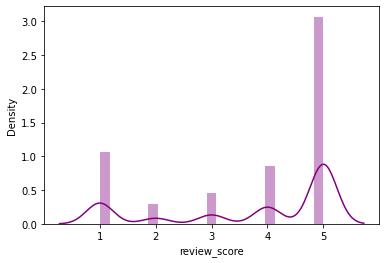

In [77]:
sns.distplot(revised_review_data['review_score'],color='purple')

From this we can infer that majority of products have got 5 ratings, the second most high rating is for 1 which becomes a concern.

In [80]:
revised_review_data['review_score'].value_counts()

5    6179
1    2158
4    1736
3     930
2     583
Name: review_score, dtype: int64

<AxesSubplot:xlabel='payment_value', ylabel='Density'>

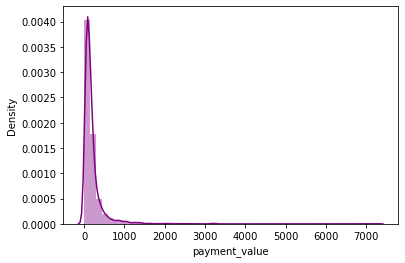

In [78]:
sns.distplot(revised_review_data['payment_value'],color='purple')

We can infer that majority of the products price range from 0-1000.

<AxesSubplot:xlabel='payment_type', ylabel='payment_installments'>

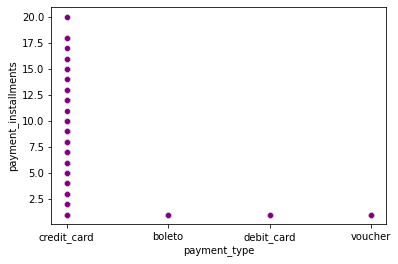

In [79]:
sns.scatterplot(revised_review_data['payment_type'],revised_review_data['payment_installments'], color='purple')

In [81]:
revised_review_data['order_status'].value_counts()

delivered    11586
Name: order_status, dtype: int64

From this we can infer that 2741 (583+2158) bad reviews (Considering 1 & 2 ratings alone to be bad reviews)

In [82]:
# selecting rows based on condition 
bad_reviews = revised_review_data.loc[revised_review_data['review_score'] <= 2] 
    
print('\nBad Reviews :\n', 
      bad_reviews)


Bad Reviews :
                                order_id  order_item_id  \
1      000aed2e25dbad2f9ddb70584c5a2ded              1   
3      001e7cf2ad6bef3ade12ebc56ceaf0f3              1   
6      0036757472ece3dde52fd4bfd929c90e              1   
19     0094bd07f49fed90209ffa62d1ef26d6              1   
22     00995d799817ecc3bd2abd8fbe59c430              1   
...                                 ...            ...   
11562  ff40f38705c95a8eceea1a0db29bff66              2   
11566  ff5b0acaf838e06bba2881e7ea4a474c              1   
11567  ff646f0b1571ec3bb3b46ddecce4d991              1   
11576  ffbcdac3da2c2f23b699666818b0d38c              1   
11579  ffc5d47e40567b5f153d5cd17138eb89              1   

                             product_id                         seller_id  \
1      4fa33915031a8cde03dd0d3e8fb27f01  fe2032dab1a61af8794248c8196565c9   
3      bdcf6a834e8faa30dac3886c7a58e92e  2a84855fd20af891be03bc5924d2b453   
6      4c1bbc12438daec98a77243c2bf7a3ba  7c67e1448b00f6e

In [83]:
bad_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2741 entries, 1 to 11579
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           2741 non-null   object 
 1   order_item_id                      2741 non-null   int64  
 2   product_id                         2741 non-null   object 
 3   seller_id                          2741 non-null   object 
 4   shipping_limit_date                2741 non-null   object 
 5   price                              2741 non-null   float64
 6   freight_value                      2741 non-null   float64
 7   customer_id                        2741 non-null   object 
 8   order_status                       2741 non-null   object 
 9   order_purchase_timestamp           2741 non-null   object 
 10  order_approved_at                  2741 non-null   object 
 11  order_delivered_carrier_date       2741 non-null   obje

In [84]:
bad_reviews.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,payment_sequential,payment_installments,payment_value
count,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000
mean,1.429405,139.541054,22.846855,35060.287486,49.336009,809.780737,2.155783,2373.747537,29.185334,17.694637,22.564393,1.212696,1.049982,3.297702,250.303605
std,0.955123,240.940535,20.533733,29041.610729,9.492708,650.650321,1.673154,4129.857903,15.762422,14.418604,11.156548,0.409289,0.305755,2.992879,418.371281
min,1.000000,0.850000,0.000000,1007.000000,11.000000,49.000000,1.000000,50.000000,11.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.120000
25%,1.000000,39.990000,13.000000,11630.000000,44.000000,373.000000,1.000000,300.000000,17.000000,9.000000,15.000000,1.000000,1.000000,1.000000,81.500000
50%,1.000000,78.000000,18.270000,25530.000000,52.000000,623.000000,1.000000,700.000000,23.000000,14.000000,20.000000,1.000000,1.000000,2.000000,147.690000
75%,2.000000,144.900000,23.650000,58401.000000,57.000000,1043.000000,3.000000,1850.000000,36.000000,22.000000,29.000000,1.000000,1.000000,5.000000,264.710000
max,12.000000,3109.990000,321.880000,99980.000000,64.000000,3933.000000,11.000000,30000.000000,105.000000,105.000000,95.000000,2.000000,7.000000,18.000000,7274.880000


In [85]:
len(bad_reviews['customer_city'].unique())

540

We can get that there are 540 unique cities with bad reviews

# Top 10 Cities with Most Order Count

In [86]:
city_top10 = revised_review_data['customer_city'].value_counts().head(15)
city_top10

sao paulo              1885
rio de janeiro          773
belo horizonte          308
brasilia                255
salvador                179
campinas                156
guarulhos               151
curitiba                136
porto alegre            128
osasco                  111
niteroi                 109
santos                   96
fortaleza                87
recife                   78
sao jose dos campos      76
Name: customer_city, dtype: int64

Text(0, 0.5, 'No. of orders')

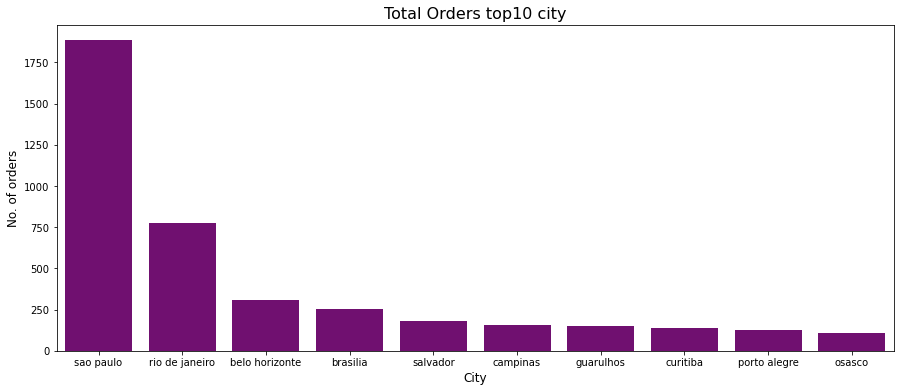

In [87]:
# Visualize the most orders top10 city
city10 = list(revised_review_data['customer_city'].value_counts().sort_values(ascending=False).head(10).index)
city10_analysis=revised_review_data[revised_review_data['customer_city'].isin(city10)]

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='customer_city', data=city10_analysis, ax=ax,order = city10_analysis['customer_city'].value_counts().index, color='purple')
ax.set_title('Total Orders top10 city', fontsize=16)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

In [88]:
city_top1_br= bad_reviews['customer_city'].value_counts().head(11)
city_top1_br

sao paulo         420
rio de janeiro    215
belo horizonte     91
brasilia           58
salvador           48
campinas           45
porto alegre       38
guarulhos          37
curitiba           35
recife             30
osasco             30
Name: customer_city, dtype: int64

Text(0, 0.5, 'No. of orders')

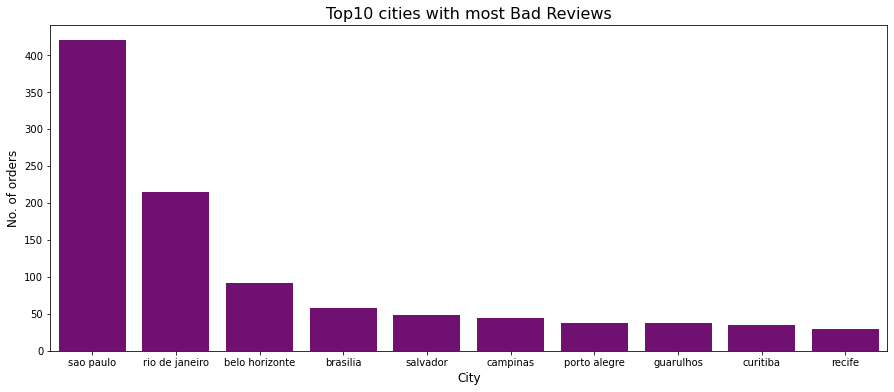

In [89]:
# Visualize the most orders top10 city
city10 = list(bad_reviews['customer_city'].value_counts().sort_values(ascending=False).head(10).index)
city10_analysis=bad_reviews[bad_reviews['customer_city'].isin(city10)]

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='customer_city', data=city10_analysis, ax=ax,order = city10_analysis['customer_city'].value_counts().index,color='purple')
ax.set_title('Top10 cities with most Bad Reviews', fontsize=16)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

There are 540 unique cities with bad reviews. Out of which Sao Paulo and rio de Janeiro stands top most in bad reviews

Text(0, 0.5, 'No. of orders')

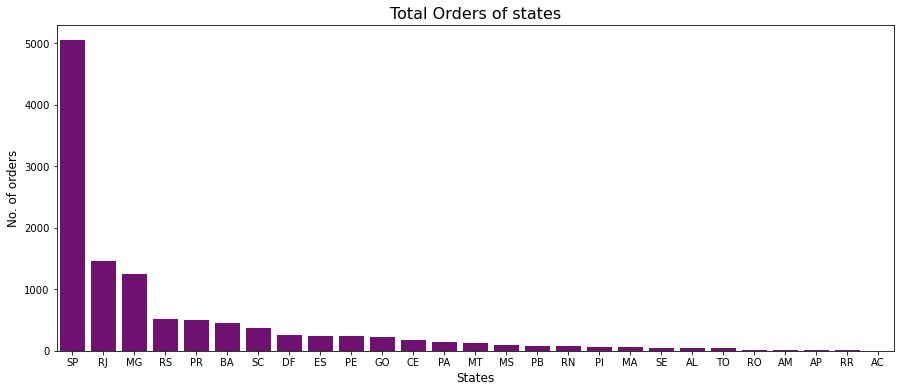

In [90]:
# Visualize Orders of states
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='customer_state', data=revised_review_data, ax=ax, order = revised_review_data['customer_state'].value_counts().index,color='purple')
ax.set_title('Total Orders of states', fontsize=16)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

Text(0, 0.5, 'No. of orders')

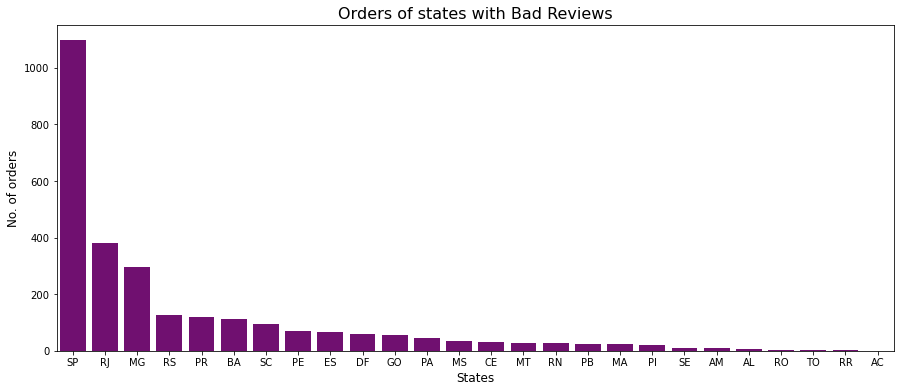

In [91]:
# Visualize Orders of states
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='customer_state', data=bad_reviews, ax=ax, order = bad_reviews['customer_state'].value_counts().index,color='purple')
ax.set_title('Orders of states with Bad Reviews', fontsize=16)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

# Calculating what % of bad reviews is from the total orders

Assume: More than 30% of total orders, it needs to be taken care of.

Sao Paulo: total orders = 1885 bad reviews = 420 = (420*100)/1885 =22.28 % of bad reviews of total orders total orders

Rio de Janeiro: total orders = 773 bad reviews = 215 = (215*100)/773 =27.81 % of bad reviews of total orders total orders

Belo Horizonte: total orders = 308 bad reviews = 91 = (91*100)/308 =29.54 % of bad reviews of total orders total orders

Brasilia: total orders = 255 bad reviews = 58 = (58*100)/255 =22.74 % of bad reviews of total orders total orders

Salvador: total orders = 179 bad reviews = 48 = (48*100)/179 =26.81 % of bad reviews of total orders total orders

Campinas: total orders = 156 bad reviews = 45 = (45*100)/156 =28.84 % of bad reviews of total orders total orders

Guarulhos: total orders = 151 bad reviews = 37 = (37*100)/151 =24.50 % of bad reviews of total orders total orders

Curitiba: total orders = 136 bad reviews = 35 = (35*100)/136 =25.73 % of bad reviews of total orders total orders

Porto Alegre: total orders = 128 bad reviews = 38 = (38*100)/128 =29.68 % of bad reviews of total orders total orders

Osasco: total orders = 111 bad reviews = 30 = (30*100)/111 =27.02 % of bad reviews of total orders total orders

Recife: total orders = 78 bad reviews = 30 = (30*100)/78 =38.46 % of bad reviews of total orders total orders

Recife, Porto Alegre & Belo Horizonte stands top among the bad reviews compared to the orders from the cities, keeping a margin of 30%

# Recife Review Score Analysis

In [95]:
recife_analysis=bad_reviews.query("customer_city == 'recife'")
recife_analysis.head(30)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
1395,1e7d25f611e794f9614dd3e10a8596e7,1,689c51a11e9c5daefc1f9b0782e28fcf,b561927807645834b59ef0d16ba55a24,2018-08-07 20:30:23,24.00,19.08,8be45a1114ff0e79615f7b8189aec7df,delivered,2018-08-01 19:43:06,...,the product has not arrived,o produto não chegou,"The delivery date was on 08/23, we are already...","A data da entrega era dia 23/08, já estamos no...",2018-08-25,2018-08-28 1:24:25,1,credit_card,1,43.08
1701,24bb40ee9b9b6fc1cf2392a93aff4f6e,1,2fea0f2cec6b6324a277d4a61c2ed2c6,beadbee30901a7f61d031b6b686095ad,2018-07-23 18:35:13,86.00,19.51,4ead00aa973c2c2a7690f03095428809,delivered,2018-07-11 18:20:18,...,I do not recommend,não recomendo,"They do not comply with the ""ones and ignore t...",Não cumprem os ´prazos e ignoram a expectativa...,2018-08-09,2018-08-09 20:24:48,1,credit_card,1,105.51
1980,2c1ebc9152c8f7fc85ac1bb07017becd,1,7aa09531577c4f30eaf1f6cbe61f6536,4d6d651bd7684af3fffabd5f08d12e5a,2018-04-03 11:35:18,129.90,57.16,4843a74362dd438d2035ac91d8ab5bbe,delivered,2018-03-28 11:22:10,...,Delay of the request,Atraso do Pedido,As we can refer to this store if you can not m...,Como podemos recomentar essa loja se os senhor...,2018-04-26,2018-04-26 13:34:29,1,credit_card,2,187.06
2037,2d78939bfc4d766dcab37fe477841c1a,1,c1dfd7dc17df380ed269d0fc905f6e22,4830e40640734fc1c52cd21127c341d4,2018-05-16 2:15:07,49.99,19.04,92c9aea03108d38e89023741442b118e,delivered,2018-05-13 2:01:30,...,I received only one of 2 items,Recebi só um dos 2 itens,I bought 2 kettles with infuser but the compan...,Comprei 2 chaleiras com infusor mas a empresa ...,2018-05-29,2018-05-29 18:51:29,1,credit_card,1,138.06
2038,2d78939bfc4d766dcab37fe477841c1a,2,c1dfd7dc17df380ed269d0fc905f6e22,4830e40640734fc1c52cd21127c341d4,2018-05-16 2:15:07,49.99,19.04,92c9aea03108d38e89023741442b118e,delivered,2018-05-13 2:01:30,...,I received only one of 2 items,Recebi só um dos 2 itens,I bought 2 kettles with infuser but the compan...,Comprei 2 chaleiras com infusor mas a empresa ...,2018-05-29,2018-05-29 18:51:29,1,credit_card,1,138.06
2574,38878bafc676263af50211706ab39e7c,1,f28fd17099749b33b6e5081515b2e797,c7fdb77fdbff3c41981bc52f787e959e,2018-04-26 18:30:48,49.00,20.52,f665e06d0376b22d2ac11e29e369d6b1,delivered,2018-04-20 17:52:08,...,Product out of packaging,PRODUTO FORA DE EMBALAGEM,Product without packaging and label. I did not...,Produto sem embalagem e etiqueta. Não entendi ...,2018-05-12,2018-05-12 17:57:08,1,debit_card,1,175.94
2575,38878bafc676263af50211706ab39e7c,2,1f58ebdc810e1d5c7cead7f763c27a94,c7fdb77fdbff3c41981bc52f787e959e,2018-04-26 18:30:48,85.90,20.52,f665e06d0376b22d2ac11e29e369d6b1,delivered,2018-04-20 17:52:08,...,Product out of packaging,PRODUTO FORA DE EMBALAGEM,Product without packaging and label. I did not...,Produto sem embalagem e etiqueta. Não entendi ...,2018-05-12,2018-05-12 17:57:08,1,debit_card,1,175.94
3217,45f323ee344dfe76bcd78bc41c962c91,1,57f2bc497c1a3ebe41ba7a06d78ed159,6560211a19b47992c3666cc44a7e94c0,2018-08-06 12:50:19,55.00,3.50,91eaf667c6a3a4a40a147e8ac21f1877,delivered,2018-08-02 12:04:55,...,Clock not delivered,Relógio não entregue,I bought 2 watches and delivered only 1. I loo...,Comprei 2 relógios e entregaram apenas 1. Agua...,2018-08-24,2018-08-28 18:32:13,1,credit_card,3,142.54
3218,45f323ee344dfe76bcd78bc41c962c91,2,060f0122cdc8f25db4a0d7359fdae7b0,6560211a19b47992c3666cc44a7e94c0,2018-08-06 12:50:19,49.00,35.04,91eaf667c6a3a4a40a147e8ac21f1877,delivered,2018-08-02 12:04:55,...,Clock not delivered,Relógio não entregue,I bought 2 watches and delivered only 1. I loo...,Comprei 2 relógios e entregaram apenas 1. Agua...,2018-08-24,2018-08-28 18:32:13,1,credit_card,3,

In [96]:
recife_analysis.drop_duplicates()
recife_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1395 to 9942
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           30 non-null     object 
 1   order_item_id                      30 non-null     int64  
 2   product_id                         30 non-null     object 
 3   seller_id                          30 non-null     object 
 4   shipping_limit_date                30 non-null     object 
 5   price                              30 non-null     float64
 6   freight_value                      30 non-null     float64
 7   customer_id                        30 non-null     object 
 8   order_status                       30 non-null     object 
 9   order_purchase_timestamp           30 non-null     object 
 10  order_approved_at                  30 non-null     object 
 11  order_delivered_carrier_date       30 non-null     obje

In [97]:
recife_analysis.seller_id.unique()

array(['b561927807645834b59ef0d16ba55a24',
       'beadbee30901a7f61d031b6b686095ad',
       '4d6d651bd7684af3fffabd5f08d12e5a',
       '4830e40640734fc1c52cd21127c341d4',
       'c7fdb77fdbff3c41981bc52f787e959e',
       '6560211a19b47992c3666cc44a7e94c0',
       'abe42c5d03695b4257b5c6cbf4e6784e',
       '7d13fca15225358621be4086e1eb0964',
       '0f0c984a4a955310903b6b6008660bad',
       '955fee9216a65b617aa5c0531780ce60',
       '4342d4b2ba6b161468c63a7e7cfce593',
       '850913d59ce317156b00f3705f1c3edb',
       'b87a7ea0c30fad2dd6781b74a0064859',
       'a254c682cc01e119f83530446f1df9a9',
       '99002261c568a84cce14d43fcffb43ea',
       '2eb70248d66e0e3ef83659f71b244378',
       '850f4f8af5ea87287ac68de36e29107f',
       '06a2c3af7b3aee5d69171b0e14f0ee87',
       'c26a2be5b53b7db6b276280da212a779',
       '66dc1b1632bd6a3e508510c5b3492107',
       '1f50f920176fa81dab994f9023523100'], dtype=object)

In [98]:
recife_analysis['seller_id'].value_counts()

6560211a19b47992c3666cc44a7e94c0    3
7d13fca15225358621be4086e1eb0964    3
1f50f920176fa81dab994f9023523100    2
66dc1b1632bd6a3e508510c5b3492107    2
4830e40640734fc1c52cd21127c341d4    2
c7fdb77fdbff3c41981bc52f787e959e    2
c26a2be5b53b7db6b276280da212a779    2
a254c682cc01e119f83530446f1df9a9    1
06a2c3af7b3aee5d69171b0e14f0ee87    1
850f4f8af5ea87287ac68de36e29107f    1
2eb70248d66e0e3ef83659f71b244378    1
99002261c568a84cce14d43fcffb43ea    1
b561927807645834b59ef0d16ba55a24    1
b87a7ea0c30fad2dd6781b74a0064859    1
850913d59ce317156b00f3705f1c3edb    1
beadbee30901a7f61d031b6b686095ad    1
955fee9216a65b617aa5c0531780ce60    1
0f0c984a4a955310903b6b6008660bad    1
abe42c5d03695b4257b5c6cbf4e6784e    1
4d6d651bd7684af3fffabd5f08d12e5a    1
4342d4b2ba6b161468c63a7e7cfce593    1
Name: seller_id, dtype: int64

In [99]:
recife_analysis['product_id'].value_counts()

422879e10f46682990de24d770e7f83d    2
c1dfd7dc17df380ed269d0fc905f6e22    2
65c61dcb0156cdde1a197f99b91488e2    2
145028037adecb27b1a58cf9597676cc    2
1e2e095149b3e9ca487d9c2d8c20378b    2
2c0c951471371afa81e47d7bf8d20522    1
6f3b5b605d91b7439c5e3f5a8dffeea7    1
af91083bde899b201798b52ae89babea    1
bc93408e78c053eb887fb66c4453f5c1    1
e0d64dcfaa3b6db5c54ca298ae101d05    1
b56ff361e0733eebc1d010432936b706    1
57414a165829139b9b534f0b4a794fe0    1
089245791e0895da94a8791bd68a2085    1
689c51a11e9c5daefc1f9b0782e28fcf    1
93a5fdb44a53e09f4a7d659420947201    1
2fea0f2cec6b6324a277d4a61c2ed2c6    1
d4a9f03055ff0e12e1821a706f554322    1
12e1e59e227d4d5da8efc0dd17831a3b    1
91442659f31ec0f0fc73215e77854fac    1
060f0122cdc8f25db4a0d7359fdae7b0    1
57f2bc497c1a3ebe41ba7a06d78ed159    1
1f58ebdc810e1d5c7cead7f763c27a94    1
f28fd17099749b33b6e5081515b2e797    1
7aa09531577c4f30eaf1f6cbe61f6536    1
97f1396a5a1f7c07ba51784efdec44b8    1
Name: product_id, dtype: int64

In [100]:
recife_analysis.loc[recife_analysis['product_id'] == '422879e10f46682990de24d770e7f83d', 'product_category_name']

9941    ferramentas_jardim
9942    ferramentas_jardim
Name: product_category_name, dtype: object

In [101]:
list_a=['422879e10f46682990de24d770e7f83d',
     'c1dfd7dc17df380ed269d0fc905f6e22',
     '65c61dcb0156cdde1a197f99b91488e2',
     '145028037adecb27b1a58cf9597676cc',
     '1e2e095149b3e9ca487d9c2d8c20378b']

In [102]:
recife_analysis.loc[recife_analysis['product_id'].isin(list_a),['product_id','seller_id','product_category_name'] ]

,product_id,seller_id,product_category_name
2037,c1dfd7dc17df380ed269d0fc905f6e22,4830e40640734fc1c52cd21127c341d4,utilidades_domesticas
2038,c1dfd7dc17df380ed269d0fc905f6e22,4830e40640734fc1c52cd21127c341d4,utilidades_domesticas
4522,1e2e095149b3e9ca487d9c2d8c20378b,7d13fca15225358621be4086e1eb0964,relogios_presentes
4523,1e2e095149b3e9ca487d9c2d8c20378b,7d13fca15225358621be4086e1eb0964,relogios_presentes
9172,145028037adecb27b1a58cf9597676cc,c26a2be5b53b7db6b276280da212a779,moveis_escritorio
9173,145028037adecb27b1a58cf9597676cc,c26a2be5b53b7db6b276280da212a779,moveis_escritorio
9209,65c61dcb0156cdde1a197f99b91488e2,66dc1b1632bd6a3e508510c5b3492107,informatica_acessorios
9210,65c61dcb0156cdde1a197f99b91488e2,66dc1b1632bd6a3e508510c5b3492107,informatica_acessorios
9941,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,ferramentas_jardim
9942,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,ferramentas_jardim


# Porto Alegre Review Score Analysis

In [103]:
porto_alegre_analysis=bad_reviews.query("customer_city == 'porto alegre'")
porto_alegre_analysis.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
870,131c6bd0b11c3fc93c3c8dbe45f317e6,1,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,2018-04-26 16:31:10,110.0,23.31,6ea2b66604e1b20a26837742dff50729,delivered,2018-04-20 16:08:48,...,Pessimal supplier.,Pessimo fornecedor.,Order of 03 scales ..... after delay in delive...,Pedido de 03 balanças.....depois de atraso na ...,2018-05-15,2018-05-16 3:30:18,1,credit_card,3,399.93
871,131c6bd0b11c3fc93c3c8dbe45f317e6,2,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,2018-04-26 16:31:10,110.0,23.31,6ea2b66604e1b20a26837742dff50729,delivered,2018-04-20 16:08:48,...,Pessimal supplier.,Pessimo fornecedor.,Order of 03 scales ..... after delay in delive...,Pedido de 03 balanças.....depois de atraso na ...,2018-05-15,2018-05-16 3:30:18,1,credit_card,3,399.93
872,131c6bd0b11c3fc93c3c8dbe45f317e6,3,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,2018-04-26 16:31:10,110.0,23.31,6ea2b66604e1b20a26837742dff50729,delivered,2018-04-20 16:08:48,...,Pessimal supplier.,Pessimo fornecedor.,Order of 03 scales ..... after delay in delive...,Pedido de 03 balanças.....depois de atraso na ...,2018-05-15,2018-05-16 3:30:18,1,credit_card,3,399.93


In [104]:
porto_alegre_analysis.drop_duplicates()
porto_alegre_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 870 to 11239
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           38 non-null     object 
 1   order_item_id                      38 non-null     int64  
 2   product_id                         38 non-null     object 
 3   seller_id                          38 non-null     object 
 4   shipping_limit_date                38 non-null     object 
 5   price                              38 non-null     float64
 6   freight_value                      38 non-null     float64
 7   customer_id                        38 non-null     object 
 8   order_status                       38 non-null     object 
 9   order_purchase_timestamp           38 non-null     object 
 10  order_approved_at                  38 non-null     object 
 11  order_delivered_carrier_date       38 non-null     obje

In [105]:
porto_alegre_analysis['seller_id'].value_counts()

1025f0e2d44d7041d6cf58b6550e0bfa    6
955fee9216a65b617aa5c0531780ce60    3
30829ded4523ab9224b93bc49a62c95f    3
59b22a78efb79a4797979612b885db36    2
7d13fca15225358621be4086e1eb0964    2
f7ba60f8c3f99e7ee4042fdef03b70c4    2
adbc26658d6c7b4b6219f9d934598091    2
4e922959ae960d389249c378d1c939f5    2
5b35136197710e16ac5e7b7c2bd4ea85    2
612170e34b97004b3ba37eae81836b4c    1
382229d1e840115ffe3dbf5ff460e417    1
d98eec89afa3380e14463da2aabaea72    1
f84fa566034f5e8e880a07ec624c56af    1
5656537e588803a555b8eb41f07a944b    1
411f3b52d857390502ee4e4d5ceabc2d    1
9f505651f4a6abe901a56cdc21508025    1
dfa0c4c6229ab200a4a1336b4d7128ff    1
c37b2059d4f90d4feead554e5246565e    1
a1043bafd471dff536d0c462352beb48    1
213b25e6f54661939f11710a6fddb871    1
f46490624488d3ff7ce78613913a7711    1
a673821011d0cec28146ea42f5ab767f    1
ceaec5548eefc6e23e6607c5435102e7    1
Name: seller_id, dtype: int64

In [106]:
porto_alegre_analysis['product_id'].value_counts()

2948658cb6abc82847412be7201bfc4c    3
3ece0f08943c87ee3e0f6bfb045250f3    2
ecf9484703bdfb9cfcc1ac9c2084b567    2
f48eb5c2fde13ca63664f0bb05f55346    2
810e2944bca9850b934e1570ba372e7d    2
7b1f2b12d9bcca133f8df7a53b55db6e    1
4a0c2a56e65c941a0bb9874c47dd66d8    1
ba74c6b75d2ad7503175809688d5a03c    1
2e77d6fda1a0aabe317689c9f6c74266    1
3a806ac1ab98107febb4ffcf38bc1fac    1
52c80cedd4e90108bf4fa6a206ef6b03    1
530d9436af6fa4960e9754ce4128b468    1
3da76d120922f2c5c94b3ec02db563c9    1
8b50a72d52d7a91fb19d19fbe069e2f2    1
9041a4cde4a900bc259d3b1b6847f6b1    1
b1d1dedf9404cb40c2cb575270828994    1
d285360f29ac7fd97640bf0baef03de0    1
a02d0123079f4ae96001ba2010d1a2df    1
15571dce56ff7d152dab99a0bc8354d5    1
741e14d6cfe9c7dfcace49c4a0989bf3    1
437c05a395e9e47f9762e677a7068ce7    1
49cd59957f1c81427ca0b2edf5696969    1
2a27bdf5d36c733df107a86e44370254    1
d670c0f6be30a062ebd8f8612ea82d71    1
6ed93af03d1f53308d3a9c6555a94d08    1
bf1b2e528a5bb0bbc9c121afd9b9c7ee    1
aecdd1c18af2

In [107]:
list_b=['2948658cb6abc82847412be7201bfc4c',
     '3ece0f08943c87ee3e0f6bfb045250f3',
     'ecf9484703bdfb9cfcc1ac9c2084b567',
     'f48eb5c2fde13ca63664f0bb05f55346',
     '810e2944bca9850b934e1570ba372e7d']

In [108]:
porto_alegre_analysis.loc[porto_alegre_analysis['product_id'].isin(list_b),['product_id','seller_id','product_category_name'] ]

,product_id,seller_id,product_category_name
870,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,beleza_saude
871,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,beleza_saude
872,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,beleza_saude
1575,810e2944bca9850b934e1570ba372e7d,1025f0e2d44d7041d6cf58b6550e0bfa,moveis_decoracao
1577,810e2944bca9850b934e1570ba372e7d,1025f0e2d44d7041d6cf58b6550e0bfa,moveis_decoracao
4043,3ece0f08943c87ee3e0f6bfb045250f3,5b35136197710e16ac5e7b7c2bd4ea85,utilidades_domesticas
4044,3ece0f08943c87ee3e0f6bfb045250f3,5b35136197710e16ac5e7b7c2bd4ea85,utilidades_domesticas
7279,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,esporte_lazer
7280,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,esporte_lazer
9883,ecf9484703bdfb9cfcc1ac9c2084b567,59b22a78efb79a4797979612b885db36,utilidades_domesticas


# Belo Horizonte Review Score Analysis

In [109]:
belo_horizonte_analysis=bad_reviews.query("customer_city == 'belo horizonte'")
belo_horizonte_analysis.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
146,033c0d8e5bce8110d7900e088c75389d,1,2ed52188df2df50745b4f6a9b0fa1c06,4d6d651bd7684af3fffabd5f08d12e5a,2018-06-15 17:30:47,179.0,44.83,77f5768427f2e8bc2958b4d206581529,delivered,2018-06-07 17:22:20,...,repentance,arrependimento,"I requested cancellation before delivery, I wa...","Solicitei o cancelamento antes da entrega, que...",2018-06-15,2018-06-18 15:19:05,1,credit_card,3,223.83
200,045eff272f42f0ae0191149686f193e1,1,44e086c4a977f37a888627b43880586c,f5a590cf36251cf1162ea35bef76fe84,2018-04-27 9:31:32,69.0,15.36,9e2ae0d82b9057c99ad147658cd4e336,delivered,2018-04-23 9:07:47,...,Until hj n I received the product,até hj n recebi o produto,n arrived,n chegou,2018-04-27,2018-05-09 13:51:14,1,credit_card,4,84.36
218,0499c7fe87611ea8ba76fc6ddceaad0e,1,282d6e7d6d123206300fc97fb779d569,14a08204d03bb6b6bde8029f801ae0eb,2018-08-06 12:05:13,69.0,15.58,a4cc4219f6af8bca6fa018f03aa054ac,delivered,2018-07-30 11:52:30,...,Terrible! Wrong product,Péssimo! Produto errado,It took a long time to arrive and the product ...,Demorou para chegar e não veio o produto que c...,2018-08-14,2018-08-15 12:19:25,1,credit_card,1,84.58


In [110]:
belo_horizonte_analysis.drop_duplicates()
belo_horizonte_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 146 to 11567
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           91 non-null     object 
 1   order_item_id                      91 non-null     int64  
 2   product_id                         91 non-null     object 
 3   seller_id                          91 non-null     object 
 4   shipping_limit_date                91 non-null     object 
 5   price                              91 non-null     float64
 6   freight_value                      91 non-null     float64
 7   customer_id                        91 non-null     object 
 8   order_status                       91 non-null     object 
 9   order_purchase_timestamp           91 non-null     object 
 10  order_approved_at                  91 non-null     object 
 11  order_delivered_carrier_date       91 non-null     obje

In [111]:
belo_horizonte_analysis['seller_id'].value_counts()

98dac6635aee4995d501a3972e047414    12
7a67c85e85bb2ce8582c35f2203ad736     6
2eb70248d66e0e3ef83659f71b244378     4
52f0fe436a347ddad7ed5f9aa4e27eaa     3
da8622b14eb17ae2831f4ac5b9dab84a     3
4d6d651bd7684af3fffabd5f08d12e5a     2
1900267e848ceeba8fa32d80c1a5f5a8     2
1025f0e2d44d7041d6cf58b6550e0bfa     2
289cdb325fb7e7f891c38608bf9e0962     2
06a2c3af7b3aee5d69171b0e14f0ee87     2
4869f7a5dfa277a7dca6462dcf3b52b2     2
3d8fa2f5b647373c8620330c4e077a9f     2
4992e76a42cb3aad7a7047e0d3d7e729     2
cfe94489ddd337d1e29e12f2a7205d10     2
04308b1ee57b6625f47df1d56f00eedf     2
056b4ada5bbc2c50cc7842547dda6b51     2
95f83f51203c626648c875dd41874c7f     2
dfa0c4c6229ab200a4a1336b4d7128ff     2
aac29b1b99776be73c3049939652091d     2
cb6c9f5888a7a090c75beaf615925792     1
3361277dc30b7cccdb0c286b24219756     1
8648b1e89e9b349e32d3741b30ec737e     1
058fd0aa2bfdb2274e05e1ae971dabb6     1
54965bbe3e4f07ae045b90b0b8541f52     1
4c18691b6037662be2df78a765d98ab5     1
f8db351d8c4c4c22c6835c19a

In [112]:
belo_horizonte_analysis['product_id'].value_counts(ascending=False).head(15)

ac1ad58efc1ebf66bfadc09f29bdedc0    6
62995b7e571f5760017991632bbfd311    6
79fca321dbd3453bd8211690e39f1659    4
c5cb254d666e4420d56b5dc67ff59d29    3
e0d64dcfaa3b6db5c54ca298ae101d05    3
82c51c3938503a4ddc096fbed86428d6    2
9614dd0585b52cd086cbdcc2dd5fcda4    2
5c3aca5c078a343b3b873362e7ac2fcc    2
372645c7439f9661fbbacfd129aa92ec    2
ccec880520770d791d004c9a1ae8b0aa    2
3f212fef0e1f11b343226b633f0426df    2
86573a992f10e1ad49a669fd151b7abf    2
b05e00841a6dad404ef34ae67807879a    2
f7740e5b4337a3cc4a8a204553101a85    1
4407440c06d8c11ce1b2e61c4382a8f3    1
Name: product_id, dtype: int64

In [113]:
list_c=['ac1ad58efc1ebf66bfadc09f29bdedc0',
     '62995b7e571f5760017991632bbfd311',
     '79fca321dbd3453bd8211690e39f1659',
     'c5cb254d666e4420d56b5dc67ff59d29',
     'e0d64dcfaa3b6db5c54ca298ae101d05', '82c51c3938503a4ddc096fbed86428d6','9614dd0585b52cd086cbdcc2dd5fcda4',
      '5c3aca5c078a343b3b873362e7ac2fcc','372645c7439f9661fbbacfd129aa92ec','ccec880520770d791d004c9a1ae8b0aa',
      '3f212fef0e1f11b343226b633f0426df','86573a992f10e1ad49a669fd151b7abf','b05e00841a6dad404ef34ae67807879a']

In [114]:
belo_horizonte_analysis.loc[belo_horizonte_analysis['product_id'].isin(list_c),['product_id','seller_id','product_category_name'] ]

,product_id,seller_id,product_category_name
909,b05e00841a6dad404ef34ae67807879a,aac29b1b99776be73c3049939652091d,moveis_decoracao
910,b05e00841a6dad404ef34ae67807879a,aac29b1b99776be73c3049939652091d,moveis_decoracao
1499,86573a992f10e1ad49a669fd151b7abf,95f83f51203c626648c875dd41874c7f,moveis_decoracao
1500,86573a992f10e1ad49a669fd151b7abf,95f83f51203c626648c875dd41874c7f,moveis_decoracao
2314,5c3aca5c078a343b3b873362e7ac2fcc,056b4ada5bbc2c50cc7842547dda6b51,relogios_presentes
2315,5c3aca5c078a343b3b873362e7ac2fcc,056b4ada5bbc2c50cc7842547dda6b51,relogios_presentes
2323,9614dd0585b52cd086cbdcc2dd5fcda4,7a67c85e85bb2ce8582c35f2203ad736,bebes
2324,9614dd0585b52cd086cbdcc2dd5fcda4,7a67c85e85bb2ce8582c35f2203ad736,bebes
2325,79fca321dbd3453bd8211690e39f1659,7a67c85e85bb2ce8582c35f2203ad736,bebes
2326,79fca321dbd3453bd8211690e39f1659,7a67c85e85bb2ce8582c35f2203ad736,bebes


In [115]:
porto_alegre_analysis.loc[porto_alegre_analysis['product_id'].isin(list_b),['product_id','seller_id','product_category_name'] ]

,product_id,seller_id,product_category_name
870,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,beleza_saude
871,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,beleza_saude
872,2948658cb6abc82847412be7201bfc4c,955fee9216a65b617aa5c0531780ce60,beleza_saude
1575,810e2944bca9850b934e1570ba372e7d,1025f0e2d44d7041d6cf58b6550e0bfa,moveis_decoracao
1577,810e2944bca9850b934e1570ba372e7d,1025f0e2d44d7041d6cf58b6550e0bfa,moveis_decoracao
4043,3ece0f08943c87ee3e0f6bfb045250f3,5b35136197710e16ac5e7b7c2bd4ea85,utilidades_domesticas
4044,3ece0f08943c87ee3e0f6bfb045250f3,5b35136197710e16ac5e7b7c2bd4ea85,utilidades_domesticas
7279,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,esporte_lazer
7280,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,esporte_lazer
9883,ecf9484703bdfb9cfcc1ac9c2084b567,59b22a78efb79a4797979612b885db36,utilidades_domesticas


In [116]:
recife_analysis.loc[recife_analysis['product_id'].isin(list_a),['product_id','seller_id','product_category_name'] ]

,product_id,seller_id,product_category_name
2037,c1dfd7dc17df380ed269d0fc905f6e22,4830e40640734fc1c52cd21127c341d4,utilidades_domesticas
2038,c1dfd7dc17df380ed269d0fc905f6e22,4830e40640734fc1c52cd21127c341d4,utilidades_domesticas
4522,1e2e095149b3e9ca487d9c2d8c20378b,7d13fca15225358621be4086e1eb0964,relogios_presentes
4523,1e2e095149b3e9ca487d9c2d8c20378b,7d13fca15225358621be4086e1eb0964,relogios_presentes
9172,145028037adecb27b1a58cf9597676cc,c26a2be5b53b7db6b276280da212a779,moveis_escritorio
9173,145028037adecb27b1a58cf9597676cc,c26a2be5b53b7db6b276280da212a779,moveis_escritorio
9209,65c61dcb0156cdde1a197f99b91488e2,66dc1b1632bd6a3e508510c5b3492107,informatica_acessorios
9210,65c61dcb0156cdde1a197f99b91488e2,66dc1b1632bd6a3e508510c5b3492107,informatica_acessorios
9941,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,ferramentas_jardim
9942,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,ferramentas_jardim


# Sao Paulo Review Score Analysis

In [117]:
sao_paulo_analysis=bad_reviews.query("customer_city == 'sao paulo'")
sao_paulo_analysis.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
23,00a379dfab816a83741012b71b264098,1,786248c98cab9ad5cccdb751909da1af,1da3aeb70d7989d1e6d9b0e887f97c23,2018-08-07 20:04:20,15.99,7.39,5e3b89299a7d6e3e10f9bc6e77923f88,delivered,2018-08-03 19:50:50,...,I did not receive the product.,Não recebi o produto.,The delivery time was until 08/08/2018 and so ...,O prazo de entrega era até dia 08/08/2018 e at...,2018-08-10,2018-08-10 16:52:14,1,credit_card,1,23.38
37,00beb247698c6aae94e3f859d279e2cd,1,216bb0e0cd43ffd832e0973d35e0377e,955fee9216a65b617aa5c0531780ce60,2018-05-29 2:18:43,45.00,7.39,fb6730884fc4466765ef8619cfe90ced,delivered,2018-05-24 22:21:17,...,waiting to evaluate,aguardando para avalia,Waiting to evaluate,Aguardando para avaliar,2018-05-30,2018-06-01 22:17:17,1,boleto,1,52.39
75,01cce1175ac3c4a450e3a0f856d02734,1,415dfa57292b8b7360d3f4cf2f9bff06,9c7fd21e0aa159b20da593371f08ff7c,2018-07-25 20:43:14,60.00,25.24,6ec610172716519f13781b3068dde24b,delivered,2018-07-19 20:32:57,...,I received only half of the prod,Recebi só metade dos prod,I received half of the products,Recebi metade dos produtos,2018-07-22,2018-07-24 19:58:22,1,debit_card,1,123.74


In [118]:
sao_paulo_analysis.drop_duplicates()
sao_paulo_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 23 to 11560
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           420 non-null    object 
 1   order_item_id                      420 non-null    int64  
 2   product_id                         420 non-null    object 
 3   seller_id                          420 non-null    object 
 4   shipping_limit_date                420 non-null    object 
 5   price                              420 non-null    float64
 6   freight_value                      420 non-null    float64
 7   customer_id                        420 non-null    object 
 8   order_status                       420 non-null    object 
 9   order_purchase_timestamp           420 non-null    object 
 10  order_approved_at                  420 non-null    object 
 11  order_delivered_carrier_date       420 non-null    obje

In [119]:
sao_paulo_analysis['seller_id'].value_counts()

2eb70248d66e0e3ef83659f71b244378    15
7c67e1448b00f6e969d365cea6b010ab    14
4a3ca9315b744ce9f8e9374361493884    14
6560211a19b47992c3666cc44a7e94c0     9
c70c1b0d8ca86052f45a432a38b73958     9
                                    ..
ebd2d60905fb58271facef5596b620d3     1
4e922959ae960d389249c378d1c939f5     1
f5b44895715ddfe3087dc414f30268f3     1
6c99c983ce3b6ba0ab813e6790e81691     1
440dd6ab244315c632130ecfb63827b1     1
Name: seller_id, Length: 217, dtype: int64

In [120]:
sao_paulo_analysis['product_id'].value_counts(ascending=False).head(20)

a8fd2715c837d04bac16cf90155919f8    6
89b121bee266dcd25688a1ba72eefb61    6
643d903164c4b6ba8bd0b68348e9d135    6
bdeac558883a62ab1a048c8f3a0cdf3c    5
43ee88561093499d9e571d4db5f20b79    4
4fe644d766c7566dbc46fb851363cb3b    4
8382f9e2420867093a37399229d3dc10    4
99a4788cb24856965c36a24e339b6058    3
3fbc0ef745950c7932d5f2a446189725    3
a62e25e09e05e6faf31d90c6ec1aa3d1    3
186f6f0ad7928097faf963de4b3e67bf    3
9fd9505539e1c67c13e4ee824fc1e1cc    3
4678fb24818cab9ec956d9b610435d9f    3
52e5fdcb5e51164483d584c75bd3a478    3
d285360f29ac7fd97640bf0baef03de0    3
9beabf555d105ca84a74570e39e64852    3
c56400aa5823575d5a92a8f98077490a    3
e7cc48a9daff5436f63d3aad9426f28b    3
64fb265487de2238627ce43fe8a67efc    3
e74384c9363e768848854356a37c73f4    2
Name: product_id, dtype: int64

In [121]:
list_d=['a8fd2715c837d04bac16cf90155919f8',
     '89b121bee266dcd25688a1ba72eefb61',
     '643d903164c4b6ba8bd0b68348e9d135',
     'bdeac558883a62ab1a048c8f3a0cdf3c',
     '43ee88561093499d9e571d4db5f20b79','4fe644d766c7566dbc46fb851363cb3b','8382f9e2420867093a37399229d3dc10',
     '99a4788cb24856965c36a24e339b6058','3fbc0ef745950c7932d5f2a446189725','a62e25e09e05e6faf31d90c6ec1aa3d1',
     '186f6f0ad7928097faf963de4b3e67bf','9fd9505539e1c67c13e4ee824fc1e1cc','4678fb24818cab9ec956d9b610435d9f',
     '52e5fdcb5e51164483d584c75bd3a478','d285360f29ac7fd97640bf0baef03de0','9beabf555d105ca84a74570e39e64852',
     'c56400aa5823575d5a92a8f98077490a','e7cc48a9daff5436f63d3aad9426f28b','64fb265487de2238627ce43fe8a67efc']

In [122]:
sp=sao_paulo_analysis.loc[sao_paulo_analysis['product_id'].isin(list_d),['product_id','seller_id','product_category_name'] ]

In [123]:
sp.head(60)

,product_id,seller_id,product_category_name
626,3fbc0ef745950c7932d5f2a446189725,06a2c3af7b3aee5d69171b0e14f0ee87,beleza_saude
1036,4fe644d766c7566dbc46fb851363cb3b,c31eff8334d6b3047ed34bebd4d62c36,artes
1123,4678fb24818cab9ec956d9b610435d9f,138dbe45fc62f1e244378131a6801526,perfumaria
1124,4678fb24818cab9ec956d9b610435d9f,138dbe45fc62f1e244378131a6801526,perfumaria
1125,4678fb24818cab9ec956d9b610435d9f,138dbe45fc62f1e244378131a6801526,perfumaria
1267,4fe644d766c7566dbc46fb851363cb3b,c31eff8334d6b3047ed34bebd4d62c36,artes
1475,a8fd2715c837d04bac16cf90155919f8,8d899e15a5925f097cca50faa49b15e3,moveis_decoracao
1476,a8fd2715c837d04bac16cf90155919f8,8d899e15a5925f097cca50faa49b15e3,moveis_decoracao
1477,a8fd2715c837d04bac16cf90155919f8,8d899e15a5925f097cca50faa49b15e3,moveis_decoracao
1478,a8fd2715c837d04bac16cf90155919f8,8d899e15a5925f097cca50faa49b15e3,moveis_decoracao


In [124]:
sp.tail(11)

,product_id,seller_id,product_category_name
10368,9fd9505539e1c67c13e4ee824fc1e1cc,f46490624488d3ff7ce78613913a7711,beleza_saude
10369,9fd9505539e1c67c13e4ee824fc1e1cc,f46490624488d3ff7ce78613913a7711,beleza_saude
10447,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,relogios_presentes
10535,8382f9e2420867093a37399229d3dc10,c70c1b0d8ca86052f45a432a38b73958,beleza_saude
10536,8382f9e2420867093a37399229d3dc10,c70c1b0d8ca86052f45a432a38b73958,beleza_saude
10537,8382f9e2420867093a37399229d3dc10,c70c1b0d8ca86052f45a432a38b73958,beleza_saude
10538,8382f9e2420867093a37399229d3dc10,c70c1b0d8ca86052f45a432a38b73958,beleza_saude
10852,52e5fdcb5e51164483d584c75bd3a478,92eb0f42c21942b6552362b9b114707d,telefonia
10853,52e5fdcb5e51164483d584c75bd3a478,92eb0f42c21942b6552362b9b114707d,telefonia
11002,d285360f29ac7fd97640bf0baef03de0,2eb70248d66e0e3ef83659f71b244378,relogios_presentes


Inference:

1 product has got ('bdeac558883a62ab1a048c8f3a0cdf3c') multiple bad reviews from same seller ('1fbe10c70e30765ed1de86d9f7e98409') (utilidades_domesticas)

1 product has got ('643d903164c4b6ba8bd0b68348e9d135') multiple bad reviews from same seller ('bbad7e518d7af88a0897397ffdca1979') (ferramentas_jardim)

1 product has got ('a8fd2715c837d04bac16cf90155919f8') multiple bad reviews from same seller ('8d899e15a5925f097cca50faa49b15e3') (moveis_decoracao)

1 product has got ('4fe644d766c7566dbc46fb851363cb3b') multiple bad reviews from same seller ('c31eff8334d6b3047ed34bebd4d62c36') (artes)

1 product has got ('89b121bee266dcd25688a1ba72eefb61') multiple bad reviews from same seller ('2eb70248d66e0e3ef83659f71b244378') (informatica_acessorios)

2 products ('c56400aa5823575d5a92a8f98077490a' & '186f6f0ad7928097faf963de4b3e67bf') of the same seller '7c67e1448b00f6e969d365cea6b010ab' has got multiple bad reviews(moveis_escritorio)

It is more likely to churn these sellers to reduce further bad reviews.

# Rio de Janeiro Review Score Analysis

In [125]:
rio_de_janeiro_analysis=bad_reviews.query("customer_city == 'rio de janeiro'")
rio_de_janeiro_analysis.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,translated_review_comment_title,review_comment_title,translated_review_comment_message,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
244,05104976125ea1e5cc04bc1f506a436a,1,63bfa27a0cee21fd896dc27f58b6d656,612170e34b97004b3ba37eae81836b4c,2018-08-19 22:44:03,198.90,18.32,161045ee99ad91883dbc1a6d26127785,delivered,2018-08-14 11:44:44,...,Heads up!,Atenção!,I put it not delivered because I had to go. Th...,Coloquei que não foi entregue por que eu que t...,2018-08-26,2018-09-01 15:23:03,1,credit_card,3,217.22
252,05369626de3379a1a26fa24e22048214,1,8fdce6f1db3b75b035989f673164487e,1900267e848ceeba8fa32d80c1a5f5a8,2018-05-16 11:51:42,95.00,3.44,d5f6259a2f0fa2907ce0d47876f0852f,delivered,2018-05-10 11:18:48,...,Partial delivery,Entrega parcial,"I bought 2 products, however only 1 has been d...","Comprei 2 produtos, no entanto apenas 1 foi en...",2018-05-19,2018-05-20 16:22:54,1,credit_card,1,162.85
253,05369626de3379a1a26fa24e22048214,2,dd768d259ee6054e0dadd66c8e2be0b6,1900267e848ceeba8fa32d80c1a5f5a8,2018-05-16 11:51:42,29.99,34.42,d5f6259a2f0fa2907ce0d47876f0852f,delivered,2018-05-10 11:18:48,...,Partial delivery,Entrega parcial,"I bought 2 products, however only 1 has been d...","Comprei 2 produtos, no entanto apenas 1 foi en...",2018-05-19,2018-05-20 16:22:54,1,credit_card,1,162.85


In [126]:
rio_de_janeiro_analysis.drop_duplicates()
rio_de_janeiro_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 244 to 11409
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           215 non-null    object 
 1   order_item_id                      215 non-null    int64  
 2   product_id                         215 non-null    object 
 3   seller_id                          215 non-null    object 
 4   shipping_limit_date                215 non-null    object 
 5   price                              215 non-null    float64
 6   freight_value                      215 non-null    float64
 7   customer_id                        215 non-null    object 
 8   order_status                       215 non-null    object 
 9   order_purchase_timestamp           215 non-null    object 
 10  order_approved_at                  215 non-null    object 
 11  order_delivered_carrier_date       215 non-null    obj

In [127]:
rio_de_janeiro_analysis['seller_id'].value_counts()

7c67e1448b00f6e969d365cea6b010ab    13
1900267e848ceeba8fa32d80c1a5f5a8    13
65febd49fd28ec955651299159b1f527     6
955fee9216a65b617aa5c0531780ce60     6
6560211a19b47992c3666cc44a7e94c0     6
                                    ..
1c68394e931a64f90ea236c5ea590300     1
d06d019f72a04e5497a0b64190af170c     1
18a349e75d307f4b4cc646a691ed4216     1
8a432f4e5b471f8da497d7dc517666e2     1
72c38a04bd6a1c3dbc5298425a0db86d     1
Name: seller_id, Length: 113, dtype: int64

In [128]:
rio_de_janeiro_analysis['product_id'].value_counts(ascending=False).head(15)

b883409932bf862f43008f116a06cda5    6
fa87bc5ccdd8ea6e54117916e485cb48    6
b781cf30a200b5eff2787c2074d67045    5
f8a7665279f140d238371c8e7604c204    4
aca2eb7d00ea1a7b8ebd4e68314663af    4
8c2f7d1e586af9f4ecd42ffa5ffc4216    3
20531b0644a0719b8d506c4db3c56609    3
2343570575e2990224008969445d7402    3
0eef510ccdaf8a53cefc1a8f035f681a    3
bebcffeb66bcb8af8112dba655b1c1c3    3
d678178aa4291cd25a755a90188375c8    3
53b36df67ebb7c41585e8d54d6772e08    3
1f8aad0f80f6d061b4d09e538ad496d7    2
e2b9488ff4e25e7fb5a2973a65eb79e2    2
083178fd17a5d863811733e46fc529ef    2
Name: product_id, dtype: int64

In [129]:
list_e=['b883409932bf862f43008f116a06cda5',
     'fa87bc5ccdd8ea6e54117916e485cb48',
     'b781cf30a200b5eff2787c2074d67045',
     'f8a7665279f140d238371c8e7604c204',
     'aca2eb7d00ea1a7b8ebd4e68314663af','8c2f7d1e586af9f4ecd42ffa5ffc4216','20531b0644a0719b8d506c4db3c56609',
     '2343570575e2990224008969445d7402','0eef510ccdaf8a53cefc1a8f035f681a','bebcffeb66bcb8af8112dba655b1c1c3',
     'd678178aa4291cd25a755a90188375c8','53b36df67ebb7c41585e8d54d6772e08']

In [130]:
rio_de_janeiro_analysis.loc[rio_de_janeiro_analysis['product_id'].isin(list_e),['product_id','seller_id','product_category_name'] ]

,product_id,seller_id,product_category_name
2147,0eef510ccdaf8a53cefc1a8f035f681a,fedf2c1386e137f296b3bbf3b635e69d,casa_construcao
2148,0eef510ccdaf8a53cefc1a8f035f681a,fedf2c1386e137f296b3bbf3b635e69d,casa_construcao
2149,0eef510ccdaf8a53cefc1a8f035f681a,fedf2c1386e137f296b3bbf3b635e69d,casa_construcao
2423,b883409932bf862f43008f116a06cda5,1a932caad4f9d804097d7f8e615baed1,construcao_ferramentas_construcao
2424,b883409932bf862f43008f116a06cda5,1a932caad4f9d804097d7f8e615baed1,construcao_ferramentas_construcao
2425,b883409932bf862f43008f116a06cda5,1a932caad4f9d804097d7f8e615baed1,construcao_ferramentas_construcao
2426,b883409932bf862f43008f116a06cda5,1a932caad4f9d804097d7f8e615baed1,construcao_ferramentas_construcao
2427,b883409932bf862f43008f116a06cda5,1a932caad4f9d804097d7f8e615baed1,construcao_ferramentas_construcao
2428,b883409932bf862f43008f116a06cda5,1a932caad4f9d804097d7f8e615baed1,construcao_ferramentas_construcao
3025,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,relogios_presentes


Inference:

2 products ('fa87bc5ccdd8ea6e54117916e485cb48') of the same seller '1900267e848ceeba8fa32d80c1a5f5a8' has got multiple bad reviews(cama_mesa_banho)
2 products ('62995b7e571f5760017991632bbfd311' & 'ac1ad58efc1ebf66bfadc09f29bdedc0') of the same seller '98dac6635aee4995d501a3972e047414' has got multiple bad reviews(utilidades_domesticas)

It is more likely to churn these two sellers to reduce further bad reviews.

In [131]:
revised_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           11586 non-null  object 
 1   order_item_id                      11586 non-null  int64  
 2   product_id                         11586 non-null  object 
 3   seller_id                          11586 non-null  object 
 4   shipping_limit_date                11586 non-null  object 
 5   price                              11586 non-null  float64
 6   freight_value                      11586 non-null  float64
 7   customer_id                        11586 non-null  object 
 8   order_status                       11586 non-null  object 
 9   order_purchase_timestamp           11586 non-null  object 
 10  order_approved_at                  11586 non-null  object 
 11  order_delivered_carrier_date       11586 non-null  obj

# Changing the data type of time & date to dates from object

In [132]:
revised_review_data['order_purchase_timestamp'].head(2)

0    2018-07-24 17:04:17
1    2018-05-11 20:33:38
Name: order_purchase_timestamp, dtype: object

In [133]:
revised_review_data['order_delivered_customer_date'].dtypes

dtype('O')

In [134]:
revised_review_data['shipping_limit_date']=pd.to_datetime(revised_review_data['shipping_limit_date'])

In [135]:
revised_review_data['order_purchase_timestamp']=pd.to_datetime(revised_review_data['order_purchase_timestamp'])

In [136]:
revised_review_data['order_delivered_carrier_date']=pd.to_datetime(revised_review_data['order_delivered_carrier_date'])

In [137]:
revised_review_data['order_delivered_customer_date']=pd.to_datetime(revised_review_data['order_delivered_customer_date'])

In [138]:
bad_reviews['shipping_limit_date']=pd.to_datetime(bad_reviews['shipping_limit_date'])

In [139]:
bad_reviews['order_purchase_timestamp']=pd.to_datetime(bad_reviews['order_purchase_timestamp'])

In [140]:
bad_reviews['order_delivered_carrier_date']=pd.to_datetime(bad_reviews['order_delivered_carrier_date'])

In [141]:
bad_reviews['order_delivered_customer_date']=pd.to_datetime(bad_reviews['order_delivered_customer_date'])

In [142]:
bad_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2741 entries, 1 to 11579
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   order_id                           2741 non-null   object        
 1   order_item_id                      2741 non-null   int64         
 2   product_id                         2741 non-null   object        
 3   seller_id                          2741 non-null   object        
 4   shipping_limit_date                2741 non-null   datetime64[ns]
 5   price                              2741 non-null   float64       
 6   freight_value                      2741 non-null   float64       
 7   customer_id                        2741 non-null   object        
 8   order_status                       2741 non-null   object        
 9   order_purchase_timestamp           2741 non-null   datetime64[ns]
 10  order_approved_at                  

In [143]:
revised_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   order_id                           11586 non-null  object        
 1   order_item_id                      11586 non-null  int64         
 2   product_id                         11586 non-null  object        
 3   seller_id                          11586 non-null  object        
 4   shipping_limit_date                11586 non-null  datetime64[ns]
 5   price                              11586 non-null  float64       
 6   freight_value                      11586 non-null  float64       
 7   customer_id                        11586 non-null  object        
 8   order_status                       11586 non-null  object        
 9   order_purchase_timestamp           11586 non-null  datetime64[ns]
 10  order_approved_at                 

In [144]:
revised_review_data['order_status']

0        delivered
1        delivered
2        delivered
3        delivered
4        delivered
           ...    
11581    delivered
11582    delivered
11583    delivered
11584    delivered
11585    delivered
Name: order_status, Length: 11586, dtype: object

# Delivery Analysis

# Total Dataset with both Good & Bad Reviews

In [145]:
delivery_analysis = revised_review_data[['order_id','product_id','shipping_limit_date','price', 'freight_value','order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','customer_city','product_weight_g','payment_value']]
delivered_analysis = delivery_analysis[delivery_analysis['order_delivered_customer_date'].notnull()]

In [146]:
delivered_analysis['processing time'] = (delivered_analysis['order_delivered_carrier_date'] - delivered_analysis['order_purchase_timestamp']).astype('timedelta64[D]')

In [147]:
delivered_analysis['delay_processing_time'] = (delivered_analysis['shipping_limit_date'] - delivered_analysis['order_delivered_carrier_date']).astype('timedelta64[D]')
delivered_analysis['shipping time'] = (delivered_analysis['order_delivered_customer_date'] - delivered_analysis['order_delivered_carrier_date']).astype('timedelta64[D]')
delivered_analysis['delivery_time'] = (delivered_analysis['order_delivered_customer_date'] - delivered_analysis['order_purchase_timestamp']).astype('timedelta64[D]')
delivered_analysis['Month'] = delivered_analysis['order_purchase_timestamp'].apply(lambda x: x.month)
delivered_analysis['Year'] = delivered_analysis['order_purchase_timestamp'].apply(lambda x: x.year)
delivered_analysis = delivered_analysis[delivered_analysis['processing time']>=0]

In [148]:
delivered_analysis.head()

,order_id,product_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,product_weight_g,payment_value,processing time,delay_processing_time,shipping time,delivery_time,Month,Year
0,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,2018-07-26 17:24:20,74.0,23.32,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22,rio de janeiro,1383,97.32,0.0,1.0,5.0,6.0,7,2018
1,000aed2e25dbad2f9ddb70584c5a2ded,4fa33915031a8cde03dd0d3e8fb27f01,2018-05-16 20:57:03,144.0,8.77,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22,santa barbara d'oeste,468,152.77,4.0,0.0,2.0,6.0,5,2018
2,00130c0eee84a3d909e75bc08c5c3ca1,89321f94e35fc6d7903d36f74e351d40,2018-06-14 05:16:24,27.9,7.94,2018-06-11 21:17:00,2018-06-12 5:16:24,2018-06-12 14:22:00,2018-06-13 15:28:25,2018-06-20,sao bernardo do campo,150,35.84,0.0,1.0,1.0,1.0,6,2018
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,bdcf6a834e8faa30dac3886c7a58e92e,2018-05-22 10:59:50,35.9,15.20,2018-05-19 10:29:23,2018-05-19 10:59:50,2018-05-21 14:34:00,2018-06-04 18:08:23,2018-06-05,coromandel,1614,51.10,2.0,0.0,14.0,16.0,5,2018
4,002175704e8b209f61b9ad5cfd92b60e,e6b6e13cf71449a457269f425b89dc74,2018-04-26 12:30:57,109.9,13.21,2018-04-22 12:13:25,2018-04-24 17:24:48,2018-04-23 19:03:19,2018-05-02 20:38:44,2018-05-14,araraquara,588,123.11,1.0,2.0,9.0,10.0,4,2018


<AxesSubplot:xlabel='delivery_time', ylabel='count'>

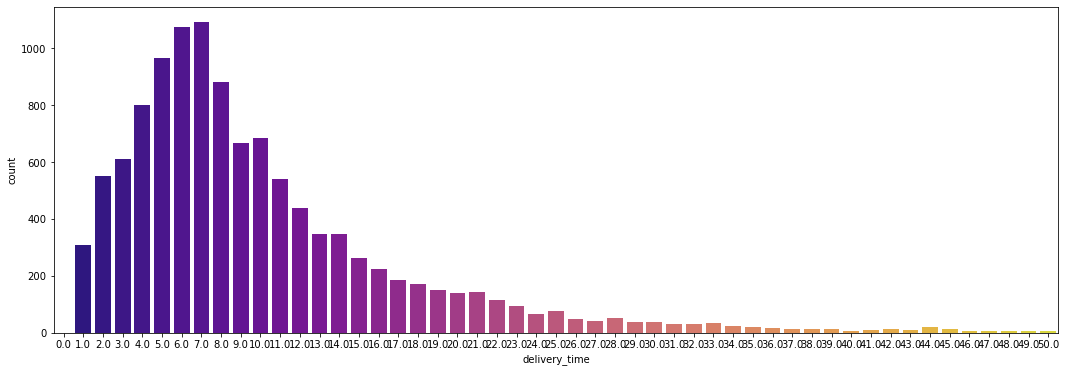

In [149]:
# countplot of delivery performance 
fig, ax = plt.subplots(figsize=(18,6))
sns.countplot(x='delivery_time',data=delivered_analysis[delivered_analysis['delivery_time'] <= 50],ax=ax,palette='plasma')

Text(0, 0.5, 'No. of orders')

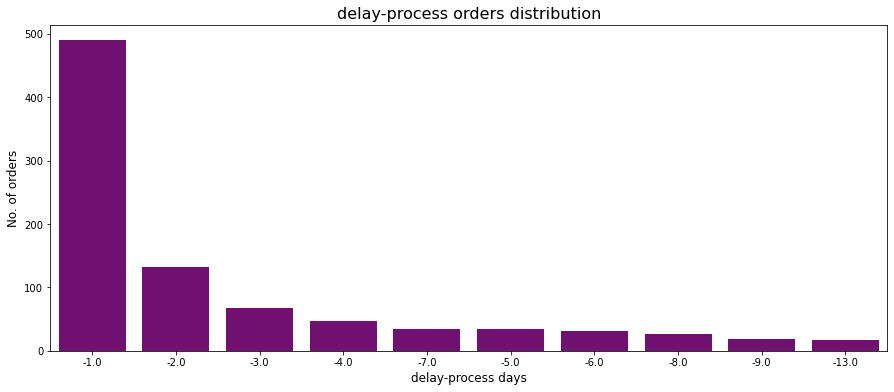

In [150]:
# Visualize the delay-process orders distribution
delay_process=list(delivered_analysis[delivered_analysis['delay_processing_time']<0]['delay_processing_time'].value_counts().head(10).index)
delay_process_analysis = delivered_analysis[delivered_analysis['delay_processing_time'].isin(delay_process)]
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='delay_processing_time', data=delay_process_analysis, ax=ax,order = delay_process_analysis['delay_processing_time'].value_counts().index,color='purple')
ax.set_title('delay-process orders distribution', fontsize=16)
ax.set_xlabel('delay-process days', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

Delay process of 2 days maximum can be accepted and days more than that are to be looked into.

Text(0, 0.5, 'No. of orders')

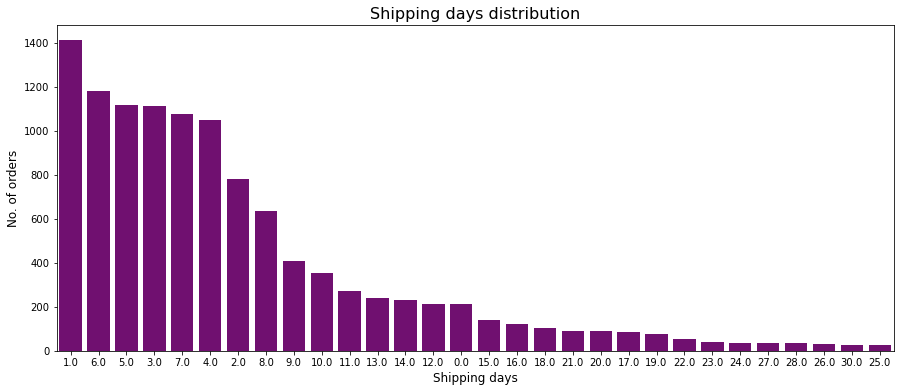

In [151]:
# Visualize the shipping days distribution
ship30 = list(delivered_analysis['shipping time'].value_counts().sort_values(ascending=False).head(30).index)
ship30_analysis=delivered_analysis[delivered_analysis['shipping time'].isin(ship30)]
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='shipping time', data=ship30_analysis, ax=ax,order = ship30_analysis['shipping time'].value_counts().index,color='purple')
ax.set_title('Shipping days distribution', fontsize=16)
ax.set_xlabel('Shipping days', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

Shipping days of maximum 5 days is accepted and days beyond that is to be noted

In [152]:
# Considering delivered in 7 days is on time, otherwise delay
delivered_analysis['On_Time']=delivered_analysis['delivery_time'].apply(lambda x:1 if x <= 7 else 0)

In [153]:
ontime = delivered_analysis['On_Time'].sum()
al = delivered_analysis['On_Time'].count()
print("ontime_rate : %5.2f" % (ontime/al))

ontime_rate :  0.47


<AxesSubplot:>

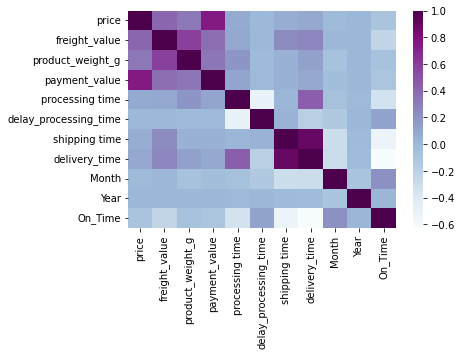

In [154]:
correlation = delivered_analysis.corr()
sns.heatmap(correlation,cmap="BuPu")
# Delay Processing Time has reveser impact on processing time, that's make sense
# prodcut weight, freight_value and payment_value has corrlection.

product weight and freight value are correlated

shipping time and delivery time heavily correlated

processing time and delivery time somewhat related

payment value and pric highly correlated

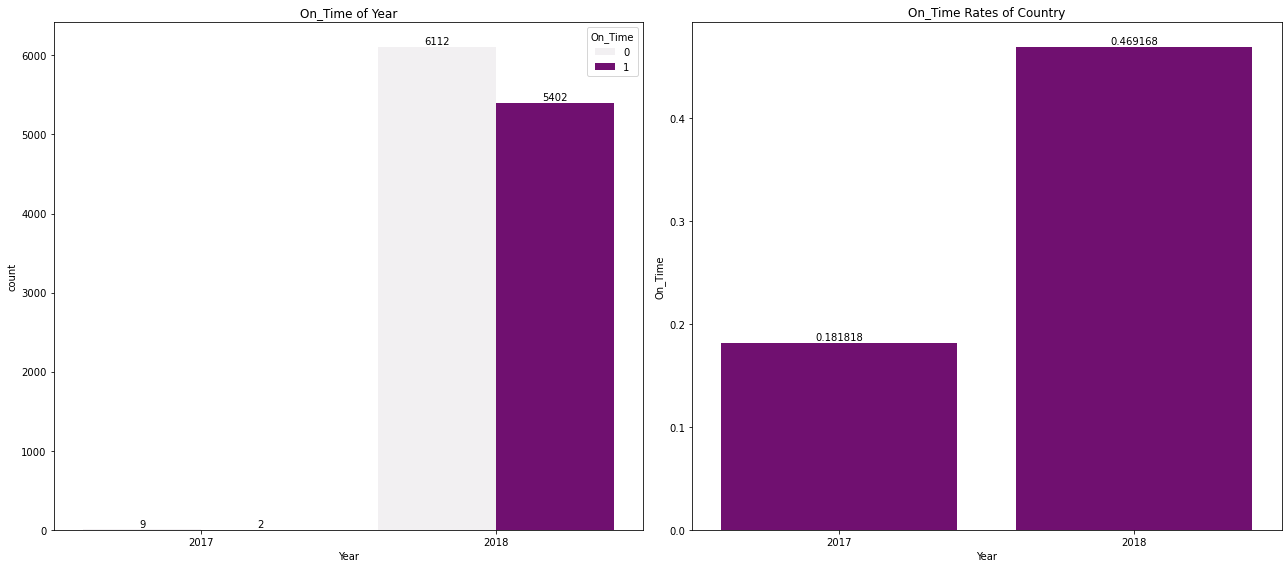

In [156]:
# Data Analysis on year
grouped = delivered_analysis[['Year','On_Time']].groupby('Year').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax1=sns.countplot(x='Year',hue='On_Time',data=delivered_analysis, ax=ax[0],color='purple')
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('On_Time of Year')
ax2=sns.barplot(x='Year',y='On_Time',data=grouped, ax=ax[1],color='purple')
ax2.bar_label(ax2.containers[0])
ax[1].set_title('On_Time Rates of Country')
plt.tight_layout()
plt.show()

On time rate has got better over the years

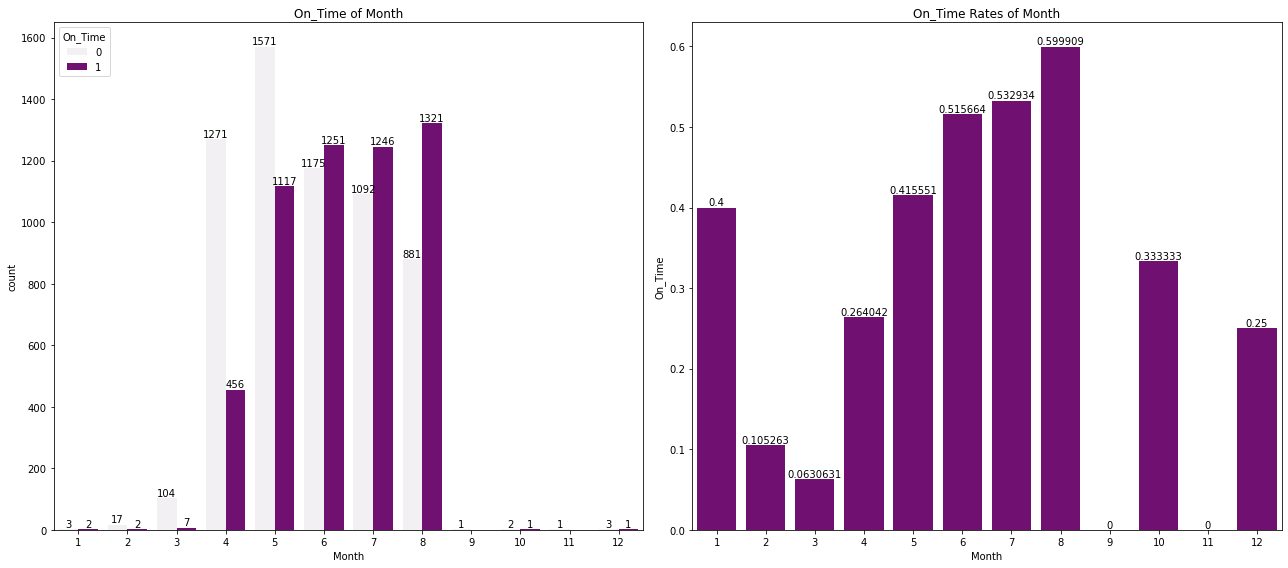

In [157]:
# Data Analysis on Month
grouped = delivered_analysis[['Month','On_Time']].groupby('Month').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax1=sns.countplot(x='Month',hue='On_Time',data=delivered_analysis, ax=ax[0],color='purple')
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('On_Time of Month')
ax2=sns.barplot(x='Month',y='On_Time',data=grouped, ax=ax[1],color='purple')
ax2.bar_label(ax2.containers[0])
ax[1].set_title('On_Time Rates of Month')
plt.tight_layout()
plt.show()

When we compare the months on time delivery has increased yet when we compare it with the total orders the cound is relatively less in each month.

In [158]:
city = list(delivered_analysis['customer_city'].value_counts().sort_values(ascending=False).head(10).index)
state_analysis=delivered_analysis['customer_city'].isin(city)
state_analysis=delivered_analysis[state_analysis]

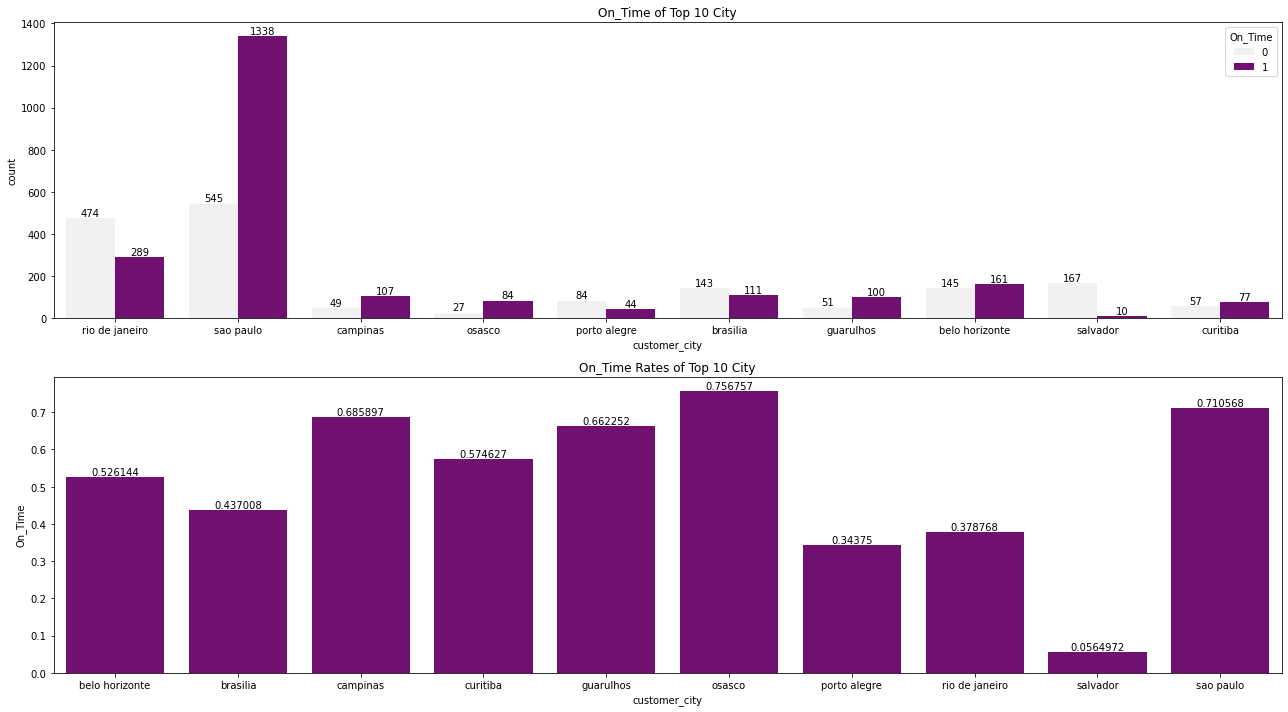

In [159]:
# Data Analysis on customer_city
grouped = state_analysis[['customer_city','On_Time']].groupby('customer_city').mean().reset_index()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,10))
ax1=sns.countplot(x='customer_city',hue='On_Time',data=state_analysis, ax=ax[0],color='purple')
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('On_Time of Top 10 City')
ax2=sns.barplot(x='customer_city',y='On_Time',data=grouped, ax=ax[1],color='purple')
ax2.bar_label(ax2.containers[0])
ax[1].set_title('On_Time Rates of Top 10 City')
plt.tight_layout()
plt.show()

# Delivery Analysis on Bad Reviews

In [160]:
delivery_analysis = bad_reviews[['order_id','product_id','shipping_limit_date','price', 'freight_value','order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','customer_city','product_weight_g','payment_value']]
delivered_analysis = delivery_analysis[delivery_analysis['order_delivered_customer_date'].notnull()]

In [161]:
delivered_analysis['processing time1'] = (delivered_analysis['order_delivered_carrier_date'] - delivered_analysis['order_purchase_timestamp']).astype('timedelta64[D]')

In [162]:
delivered_analysis['delay_processing_time1'] = (delivered_analysis['shipping_limit_date'] - delivered_analysis['order_delivered_carrier_date']).astype('timedelta64[D]')
delivered_analysis['shipping time1'] = (delivered_analysis['order_delivered_customer_date'] - delivered_analysis['order_delivered_carrier_date']).astype('timedelta64[D]')
delivered_analysis['delivery_time1'] = (delivered_analysis['order_delivered_customer_date'] - delivered_analysis['order_purchase_timestamp']).astype('timedelta64[D]')
delivered_analysis['Month1'] = delivered_analysis['order_purchase_timestamp'].apply(lambda x: x.month)
delivered_analysis['Year1'] = delivered_analysis['order_purchase_timestamp'].apply(lambda x: x.year)
delivered_analysis = delivered_analysis[delivered_analysis['processing time1']>=0]

In [163]:
delivered_analysis.head()

,order_id,product_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,product_weight_g,payment_value,processing time1,delay_processing_time1,shipping time1,delivery_time1,Month1,Year1
1,000aed2e25dbad2f9ddb70584c5a2ded,4fa33915031a8cde03dd0d3e8fb27f01,2018-05-16 20:57:03,144.00,8.77,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22,santa barbara d'oeste,468,152.77,4.0,0.0,2.0,6.0,5,2018
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,bdcf6a834e8faa30dac3886c7a58e92e,2018-05-22 10:59:50,35.90,15.20,2018-05-19 10:29:23,2018-05-19 10:59:50,2018-05-21 14:34:00,2018-06-04 18:08:23,2018-06-05,coromandel,1614,51.10,2.0,0.0,14.0,16.0,5,2018
6,0036757472ece3dde52fd4bfd929c90e,4c1bbc12438daec98a77243c2bf7a3ba,2018-08-08 15:10:11,136.99,66.04,2018-07-19 14:58:59,2018-07-19 15:10:11,2018-08-07 07:45:00,2018-08-09 14:33:40,2018-08-20,bauru,15475,203.03,18.0,1.0,2.0,20.0,7,2018
19,0094bd07f49fed90209ffa62d1ef26d6,d64e758afad411049a45e42c9a259241,2018-05-09 04:12:53,11.53,7.39,2018-05-01 02:04:16,2018-05-03 4:12:53,2018-05-10 19:19:00,2018-05-16 21:12:15,2018-05-14,praia grande,100,18.92,9.0,-2.0,6.0,15.0,5,2018
22,00995d799817ecc3bd2abd8fbe59c430,f3b8bfa5b86249e75e5c0632acc0e82e,2018-08-01 11:45:13,49.90,12.92,2018-07-26 11:25:18,2018-07-26 11:45:13,2018-08-01 14:05:00,2018-08-02 18:56:52,2018-08-08,sao goncalo,2550,62.82,6.0,-1.0,1.0,7.0,7,2018


<AxesSubplot:xlabel='delivery_time1', ylabel='count'>

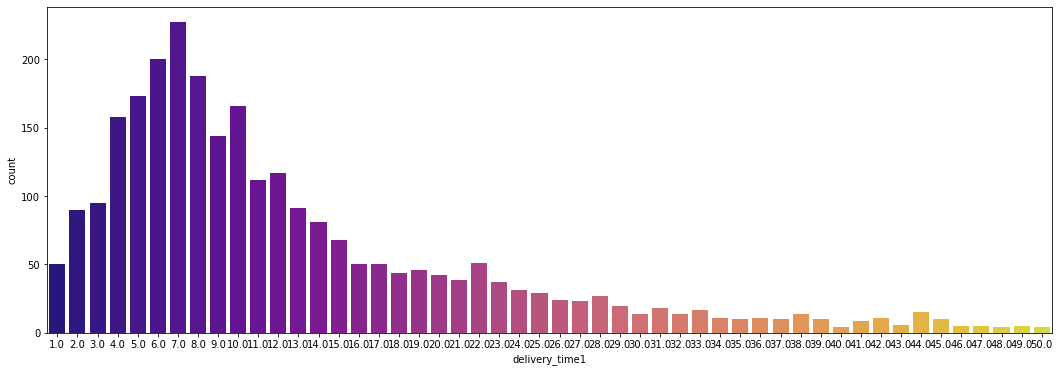

In [164]:
# countplot of delivery performance 
fig, ax = plt.subplots(figsize=(18,6))
sns.countplot(x='delivery_time1',data=delivered_analysis[delivered_analysis['delivery_time1']<=50],ax=ax,palette='plasma')

Text(0, 0.5, 'No. of orders')

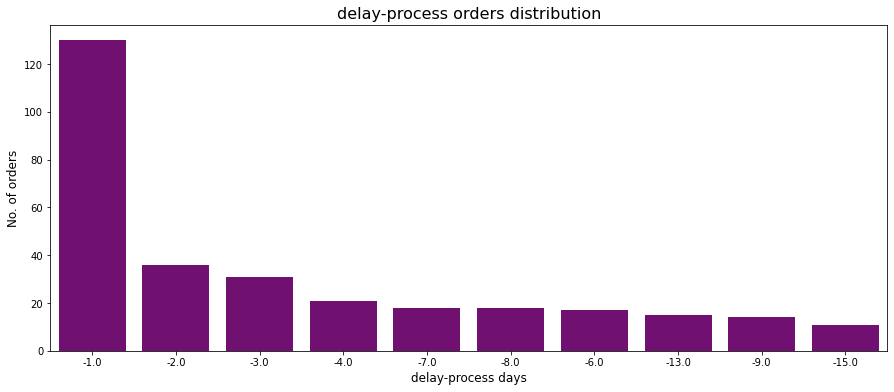

In [165]:
# Visualize the delay-process orders distribution
delay_process=list(delivered_analysis[delivered_analysis['delay_processing_time1']<0]['delay_processing_time1'].value_counts().head(10).index)
delay_process_analysis = delivered_analysis[delivered_analysis['delay_processing_time1'].isin(delay_process)]
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='delay_processing_time1', data=delay_process_analysis, ax=ax,order = delay_process_analysis['delay_processing_time1'].value_counts().index,color='purple')
ax.set_title('delay-process orders distribution', fontsize=16)
ax.set_xlabel('delay-process days', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

Most people have given bad reviews even for 1 day delay process. So, focusing on 1 day delay can reduce the negative reviews

Text(0, 0.5, 'No. of orders')

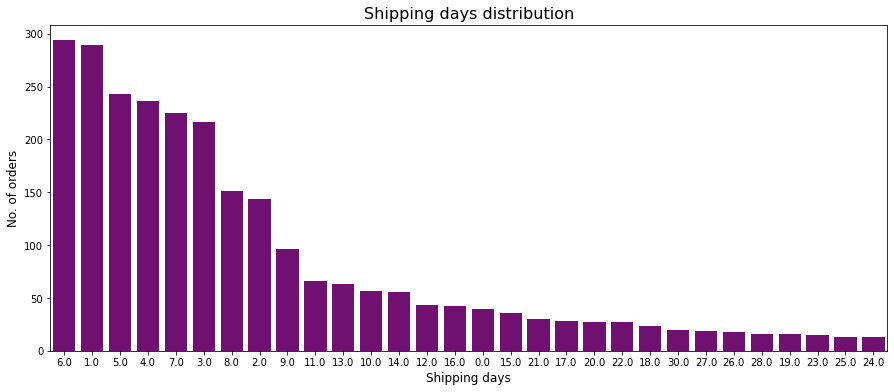

In [166]:
# Visualize the shipping days distribution
ship30 = list(delivered_analysis['shipping time1'].value_counts().sort_values(ascending=False).head(30).index)
ship30_analysis=delivered_analysis[delivered_analysis['shipping time1'].isin(ship30)]
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='shipping time1', data=ship30_analysis, ax=ax,order = ship30_analysis['shipping time1'].value_counts().index,color='purple')
ax.set_title('Shipping days distribution', fontsize=16)
ax.set_xlabel('Shipping days', fontsize=12)
ax.set_ylabel('No. of orders', fontsize=12)

In [167]:
# Considering delivered in 7 days is on time, otherwise delay
delivered_analysis['On_Time1']=delivered_analysis['delivery_time1'].apply(lambda x:1 if x <= 7 else 0)

In [168]:
ontime = delivered_analysis['On_Time1'].sum()
al = delivered_analysis['On_Time1'].count()
print("ontime_rate : %5.2f" % (ontime/al))

ontime_rate :  0.36


<AxesSubplot:>

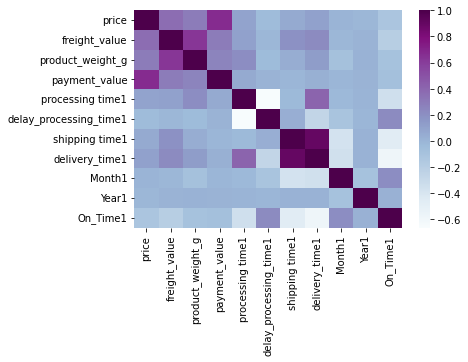

In [169]:
correlation = delivered_analysis.corr()
sns.heatmap(correlation,cmap="BuPu")
# Delay Processing Time has reveser impact on processing time, that's make sense
# prodcut weight, freight_value and payment_value has corrlection.

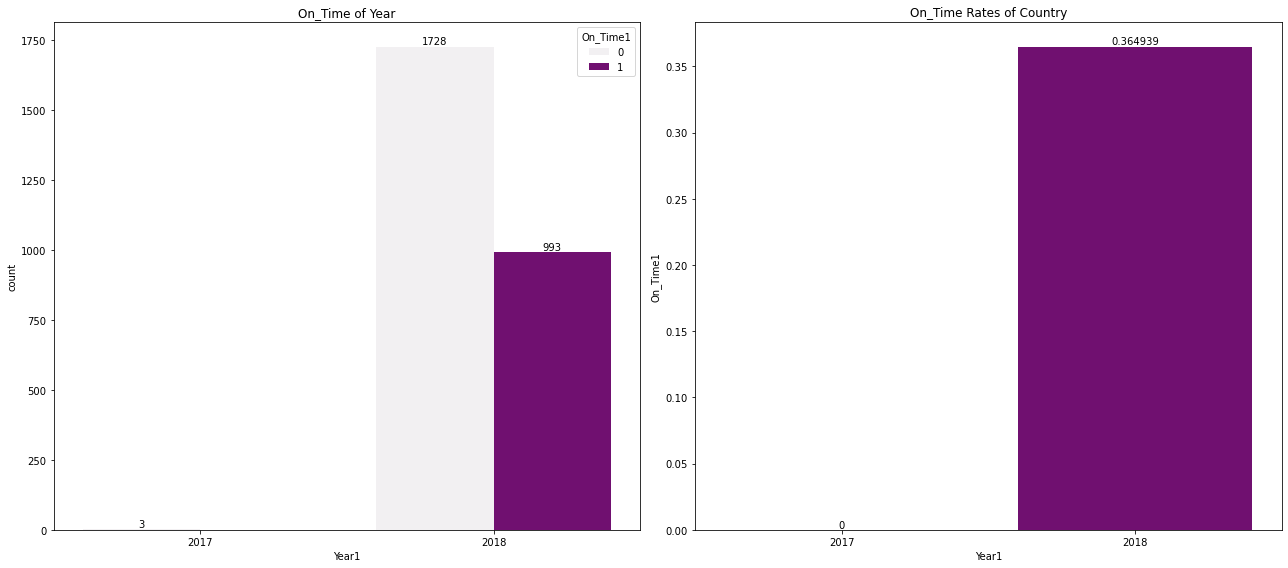

In [170]:
# Data Analysis on year
grouped = delivered_analysis[['Year1','On_Time1']].groupby('Year1').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax1=sns.countplot(x='Year1',hue='On_Time1',data=delivered_analysis, ax=ax[0],color='purple')
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('On_Time of Year')
ax2=sns.barplot(x='Year1',y='On_Time1',data=grouped, ax=ax[1],color='purple')
ax2.bar_label(ax2.containers[0])
ax[1].set_title('On_Time Rates of Country')
plt.tight_layout()
plt.show()

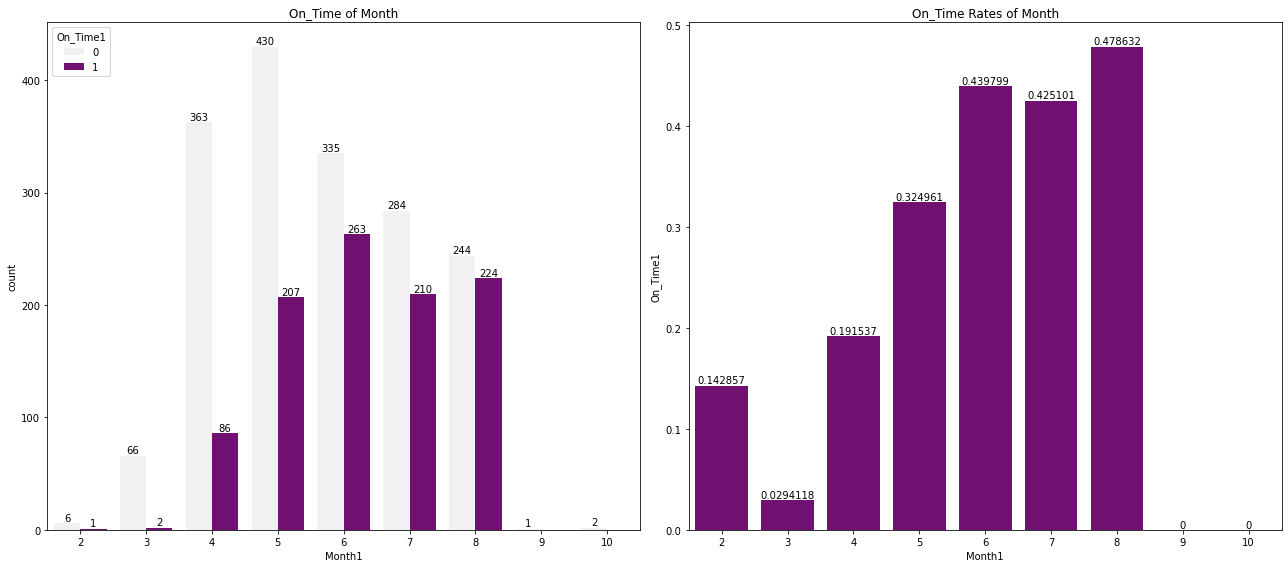

In [171]:
# Data Analysis on Month
grouped = delivered_analysis[['Month1','On_Time1']].groupby('Month1').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax1=sns.countplot(x='Month1',hue='On_Time1',data=delivered_analysis, ax=ax[0],color='purple')
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('On_Time of Month')
ax2=sns.barplot(x='Month1',y='On_Time1',data=grouped, ax=ax[1],color='purple')
ax2.bar_label(ax2.containers[0])
ax[1].set_title('On_Time Rates of Month')
plt.tight_layout()
plt.show()

In [172]:
city = list(delivered_analysis['customer_city'].value_counts().sort_values(ascending=False).head(10).index)
state_analysis=delivered_analysis['customer_city'].isin(city)
state_analysis=delivered_analysis[state_analysis]

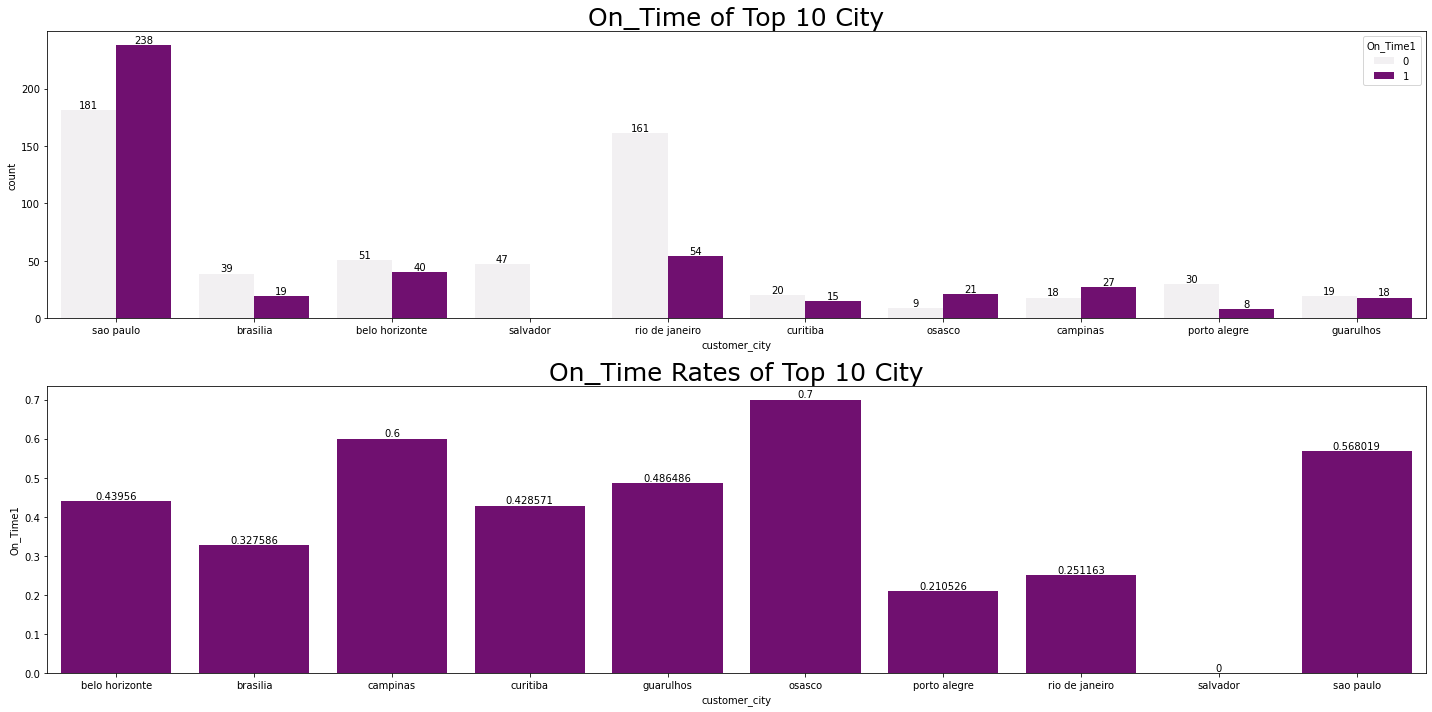

In [173]:
# Data Analysis on customer_city
grouped = state_analysis[['customer_city','On_Time1']].groupby('customer_city').mean().reset_index()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
ax1=sns.countplot(x='customer_city',hue='On_Time1',data=state_analysis, ax=ax[0],color='purple')
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('On_Time of Top 10 City', fontname='Verdana',fontsize=25)
ax2=sns.barplot(x='customer_city',y='On_Time1',data=grouped, ax=ax[1],color='purple')
ax2.bar_label(ax2.containers[0])
ax[1].set_title('On_Time Rates of Top 10 City',fontname='Verdana',fontsize=25)
plt.tight_layout()
plt.show()

# SUGGESTION:

1.From the above analysis drop the sellers who have received bad reviews in the mentioned cities.

2.Focus on reducing the delay process in most ordered cities.

3.Focus on reducing the 1 day delay.

4.Collaborate with sellers who has warehouse within city limit so the items are delivered on time.

5.Make the product unavailable on website when the product is not available.

6.Top 10 cities with total orders except Salvado have higher on-time rate than average rate. It is clear that international shipments will take more delivery time. Could establish new channel to ship packages to Salvado. In domestic, Brasilia, Porto llegre and Rio de janeiro has significant potential to get one step ahead on-time delivery.

7.In Sao Paulo to reduce the shiping time, pick vendors who has warehouse within city limit.